In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re
from utility import *

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [3]:
%matplotlib inline

In [4]:
from scipy import stats
def box_cox_normalise(ser, offset = 3, bw='scott'):
    
    
    # box cox lr_scale
    fig = plt.figure()
    ax1 = fig.add_subplot(311)
    x = ser.values +ser.values.min()+offset
    prob = stats.probplot(x, dist=stats.norm, plot=ax1)
    ax1.set_xlabel('')
    ax1.set_title('Probplot against normal distribution')
    ax2 = fig.add_subplot(312)
    xt, _ = stats.boxcox(x)
    prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
    ax2.set_title('Probplot after Box-Cox transformation')
    ax3 = fig.add_subplot(313)
    xt_std = (xt-xt.mean())/xt.std()
    sns.kdeplot(xt_std, ax=ax3, bw=bw, cut=0);
    sns.kdeplot(np.random.normal(size=len(xt_std)), ax=ax3, cut=0);
    plt.suptitle(ser.name)
    return xt_std
    
    

In [5]:
Dataset_directory = ".."+os.sep+"Datasets"+os.sep

In [5]:
## (1) PERSONALITY DATASET

personality_dataset = "personality-isf2018"

personality_data = pd.read_csv(Dataset_directory+ personality_dataset +os.sep+"personality-data.csv")
ratings = pd.read_csv(Dataset_directory+ personality_dataset +os.sep+"ratings.csv")

# remove random spaces in column names!
personality_data.columns = [x.strip() for x in personality_data.columns]

# remove random spaces and deal with typo in userid
ratings.columns = ['userid', 'movie_id', 'rating', 'tstamp']

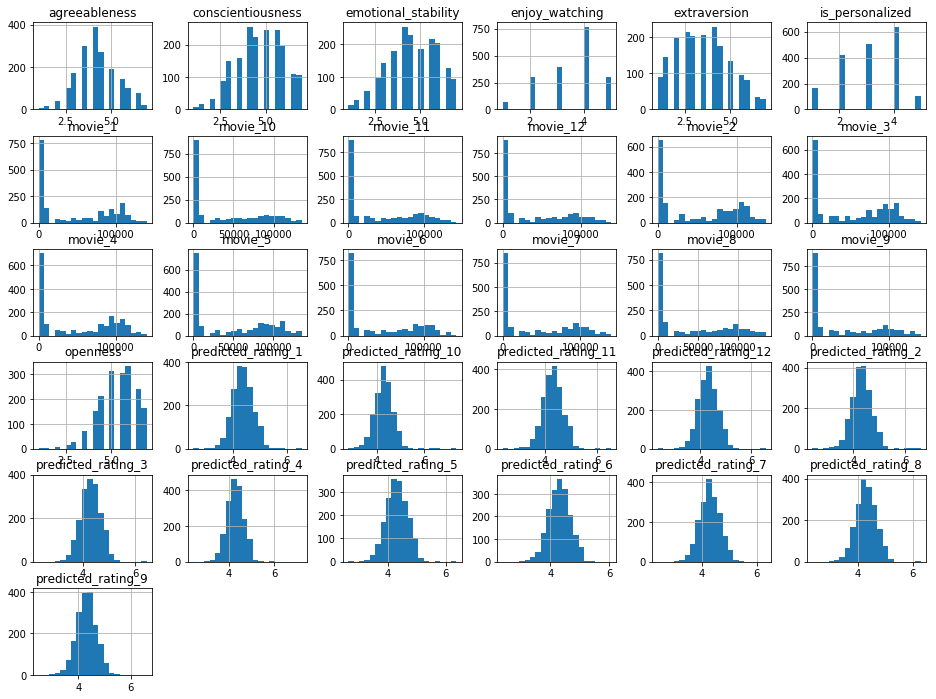

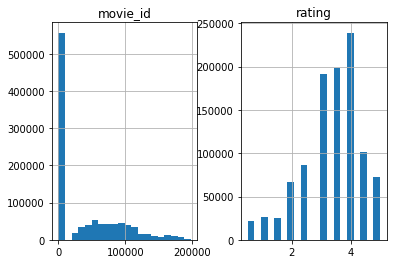

In [15]:
personality_data.hist(figsize=(16,12),bins=20);
ratings.hist(bins=20);

In [7]:
movied_id_mean_ratings = ratings[["movie_id","rating"]].groupby("movie_id").mean()

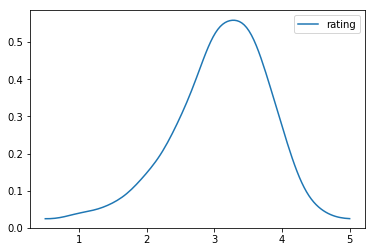

In [14]:
sns.kdeplot( movied_id_mean_ratings["rating"] , bw=.25, cut=0);

In [456]:
# movied_id_mean_ratings["rating"].value_counts().sort_index()

In [438]:
# high_rated_movies = movied_id_mean_ratings["rating"][movied_id_mean_ratings["rating"]==5].index

In [452]:
# low_rated_movies = movied_id_mean_ratings["rating"][movied_id_mean_ratings["rating"]==0.5].index

In [ ]:
# low rated movies seem to agree with ML ratings
# high rated movies not at all ???

In [16]:
ratings["movie_id"].max()

198117

In [17]:
personality_data_plus_mean_and_std_rat = personality_data.merge(ratings[["userid","rating"]].groupby("userid").mean(), left_on="userid", right_on="userid").merge(ratings[["userid","rating"]].groupby("userid").std(), left_on="userid", right_on="userid").copy()
personality_data_plus_mean_and_std_rat.columns = ['userid', 'openness', 'agreeableness', 'emotional_stability',
       'conscientiousness', 'extraversion', 'assigned metric',
       'assigned condition', 'movie_1', 'predicted_rating_1', 'movie_2',
       'predicted_rating_2', 'movie_3', 'predicted_rating_3', 'movie_4',
       'predicted_rating_4', 'movie_5', 'predicted_rating_5', 'movie_6',
       'predicted_rating_6', 'movie_7', 'predicted_rating_7', 'movie_8',
       'predicted_rating_8', 'movie_9', 'predicted_rating_9', 'movie_10',
       'predicted_rating_10', 'movie_11', 'predicted_rating_11', 'movie_12',
       'predicted_rating_12', 'is_personalized', 'enjoy_watching',  'rating_mean', 'rating_std']

In [18]:
personality_data_plus_mean_and_std_rat[["openness","agreeableness","emotional_stability","conscientiousness","extraversion",'rating_mean', 'rating_std']].corr()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,rating_mean,rating_std
openness,1.000000,0.055357,0.075027,0.010792,0.260681,0.072959,0.073349
agreeableness,0.055357,1.000000,0.177512,0.076279,0.106503,0.121999,-0.101327
emotional_stability,0.075027,0.177512,1.000000,0.280099,0.036384,0.042709,-0.038236
conscientiousness,0.010792,0.076279,0.280099,1.000000,0.004265,0.012426,0.001874
extraversion,0.260681,0.106503,0.036384,0.004265,1.000000,0.121898,-0.018956
rating_mean,0.072959,0.121999,0.042709,0.012426,0.121898,1.000000,-0.467930
rating_std,0.073349,-0.101327,-0.038236,0.001874,-0.018956,-0.467930,1.000000


In [8]:
pattern = "rating_mean"
name = "rating_mean"
corr_type = "spearman"
df,corr_type = make_corr_summary(personality_data_plus_mean_and_std_rat[["openness","agreeableness","emotional_stability","conscientiousness","extraversion",'rating_mean', 'rating_std']],
                                 name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)


,r,p,N
agreeableness,0.13,0.00,1834
extraversion,0.12,0.00,1834
openness,0.07,0.00,1834
rating_std,-0.45,0.00,1834
,r,p,N
rating_std,-0.45,0.00,1834
openness,0.07,0.00,1834
extraversion,0.12,0.00,1834
agreeableness,0.13,0.00,1834


In [9]:
pattern = "rating_std"
name = "rating_std"
corr_type = "spearman"
df,corr_type = make_corr_summary(personality_data_plus_mean_and_std_rat[["openness","agreeableness","emotional_stability","conscientiousness","extraversion",'rating_mean', 'rating_std']],
                                 name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)


,r,p,N
openness,0.1,0.00,1834
agreeableness,-0.11,0.00,1834
rating_mean,-0.45,0.00,1834
,r,p,N
rating_mean,-0.45,0.00,1834
agreeableness,-0.11,0.00,1834
openness,0.1,0.00,1834


In [557]:
## (2) The Movies Database dataset 50k movies

dataset = "The_Movies_Dataset"

# cast, crew, id (45476, 3)
# cast -> cast_id,character,credit_id,gender,id,name,order,profile_path
# crew -> credit_id,department,gender,id,job,name,profile_path
credits = pd.read_csv(Dataset_directory+ dataset +os.sep+"credits.csv")

# id, keywords (46419, 2)
# keywords -> id,name
keywords = pd.read_csv(Dataset_directory+ dataset +os.sep+"keywords.csv")

# movieId, imdbId, tmdbId (45843, 3)
links = pd.read_csv(Dataset_directory+ dataset +os.sep+"links.csv")

# movieId, imdbId, tmdbId (9125, 3)
links_small = pd.read_csv(Dataset_directory+ dataset +os.sep+"links_small.csv")

# adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,
# poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,
# title,video,vote_average,vote_count (45466, 24)

# genres -> id,name
# production_companies -> id,name
# production_countries -> iso_3166_1,name
# spoken_languages -> iso_639_1,name
movies_metadata = pd.read_csv(Dataset_directory+ dataset +os.sep+"movies_metadata.csv")

# userId,movieId,rating,timestamp (26024289, 4)
ratings = pd.read_csv(Dataset_directory+ dataset +os.sep+"ratings.csv")

# userId,movieId,rating,timestamp (45466, 24)
ratings_small = pd.read_csv(Dataset_directory+ dataset +os.sep+"ratings_small.csv")

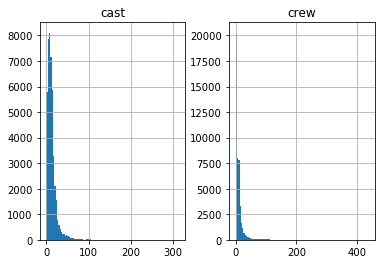

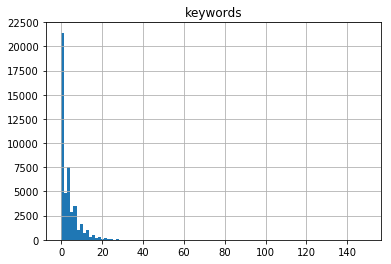

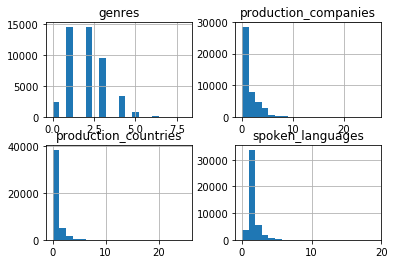

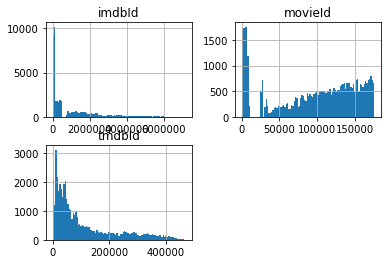

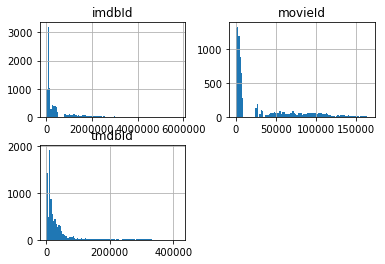

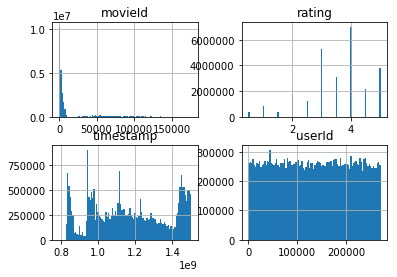

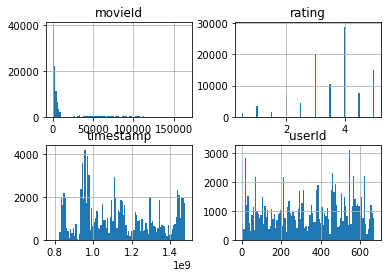

In [136]:
credits.drop("id",axis=1).applymap(lambda x:len(x.split("{"))-1).hist(bins=100); # eval is too slow!
keywords.drop("id",axis=1).applymap(lambda x:len(x.split("{"))-1).hist(bins=100); # eval is too slow!

movies_metadata[["genres","production_companies","production_countries","spoken_languages"]]\
    .dropna()\
    .applymap(lambda x:len(x.split("{"))-1)\
    .hist(bins=20);

links.hist(bins=100);
links_small.hist(bins=100);

ratings.hist(bins=100);
ratings_small.hist(bins=100);

In [204]:
## (3) The Movie Lens latest 58k movies

dataset = "Movie_Lens_Latest"
# informative README.txt!

# tagId,tag (1128,  2)
genome_tags = pd.read_csv(Dataset_directory+ dataset +os.sep+"genome-tags.csv")

# movieId,imdbId,tmdbId (58,098,  3)
links = pd.read_csv(Dataset_directory+ dataset +os.sep+"links.csv")

# movieId,title,genres (58,098,  3)
# genres -> | separated list
#    Romance,Fantasy,IMAX,Action,Sci-Fi,Western,Drama,Horror,Mystery,Adventure,War,Comedy,Musical,Documentary,Thriller,
#    Film-Noir,(no genres listed),Crime,Animation,Children'
movies = pd.read_csv(Dataset_directory+ dataset +os.sep+"movies.csv")

# userId,movieId,tag,timestamp (1,108,997,  4)
# tags look user submitted - 74714 different tags - not consistent with genome_tags length/tagId range
tags = pd.read_csv(Dataset_directory+ dataset +os.sep+"tags.csv")

# movieId,tagId,relevance (14,862,528,  3)
# each of 1128 tagIds x 13176 movieIds (dense matrix)
# relevance is machine learning output (inverse distribution)
genome_scores = pd.read_csv(Dataset_directory+ dataset +os.sep+"genome-scores.csv")

# userId,movieId,rating,timestamp (27,753,444,  4)
ratings = pd.read_csv(Dataset_directory+ dataset +os.sep+"ratings.csv")



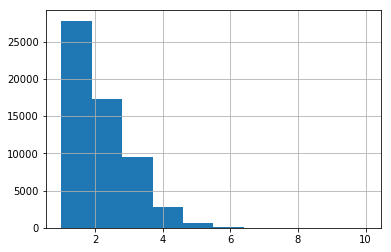

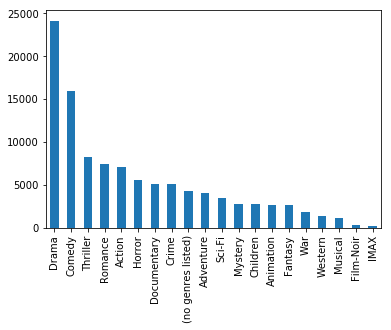

In [178]:
genre_list = list(set([item for sublist in movies["genres"].apply(lambda x: x.split("|")).values for item in sublist]))
genre_df = pd.DataFrame({genre: movies["genres"].apply(lambda x: x.split("|")).apply(lambda x: genre in x) for genre in genre_list})
movies["genres"].apply(lambda x: len(x.split("|"))).hist();
plt.figure()
genre_df.sum().sort_values(ascending=False).plot(kind='bar');



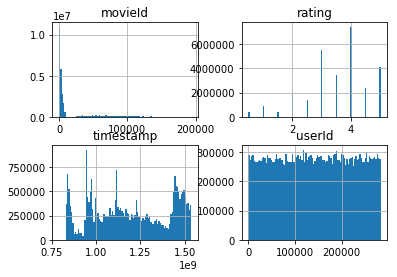

In [226]:
ratings.hist(bins=100);

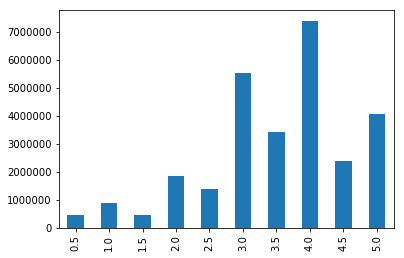

In [228]:
ratings["rating"].value_counts().sort_index().plot(kind='bar');

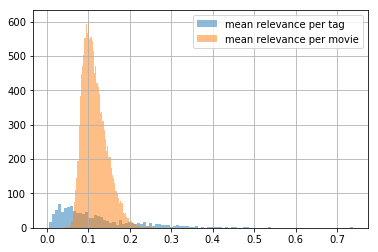

In [229]:
genome_scores.groupby("tagId")["relevance"].mean().hist(bins=100, alpha=.5, label="mean relevance per tag");
genome_scores.groupby("movieId")["relevance"].mean().hist(bins=100, alpha=.5, label="mean relevance per movie");
plt.legend();


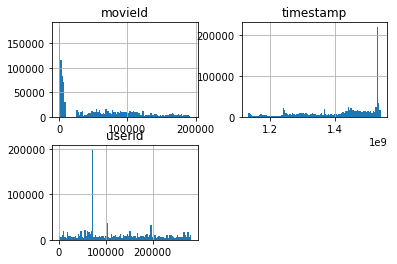

In [182]:
tags.hist(bins=100);

Text(0.5, 1.0, 'top 50 most common tags of 74714')

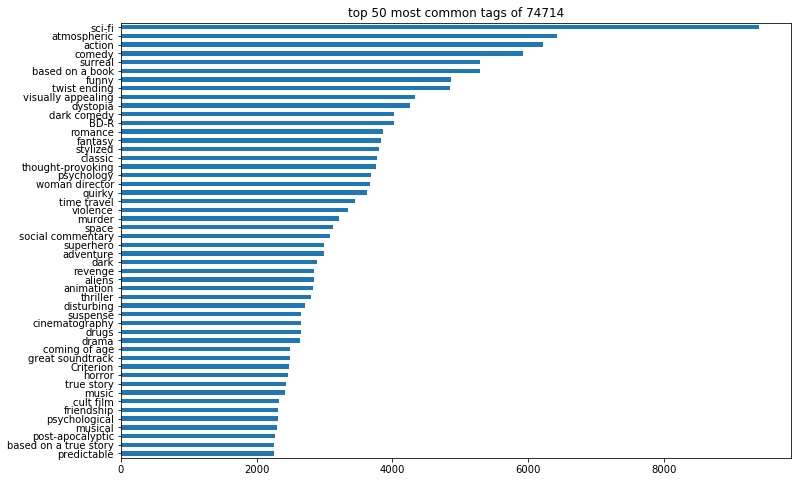

In [194]:
tags["tag"].value_counts().head(50).sort_values().plot(kind='barh', figsize=(12,8));
plt.title("top 50 most common tags of 74714");

In [237]:
%%time
tags_not_in_genome = tags["tag"].apply(lambda x:x not in genome_tags["tag"].values)

tags["tag"][~tags_not_in_genome].value_counts().head(50) # Length: 1101

tags["tag"][tags_not_in_genome].value_counts().head(50) # length =73613


# not clear what distinguishes tags they used from ones they didn't

Wall time: 49.9 s


In [14]:
## (4) Imdb data (not for commercial use!)

# https://www.imdb.com/interfaces/
# Subsets of IMDb data are available for access to customers for personal and non-commercial use.
# You can hold local copies of this data, and it is subject to our terms and conditions.

# Meh - this seems pretty unequivocal - guess I can look at it to get a sense of the origin of other datasets
    
dataset = "Imdb_non_commercial_use"

# tconst,averageRating,numVotes (933184, 3)
ratings = pd.read_csv(Dataset_directory+ dataset +os.sep+"ratings.tsv", sep='\t')

# tconst,parentTconst,seasonNumber,episodeNumber (4063014, 4)
episode = pd.read_csv(Dataset_directory+ dataset +os.sep+"episode.tsv", sep='\t')

# titleId,ordering,title,region,language,types,attributes,isOriginalTitle (3665052, 8)
akas = pd.read_csv(Dataset_directory+ dataset +os.sep+"akas.tsv", sep='\t')

# tconst,directors,writers (5862042, 3)
crew = pd.read_csv(Dataset_directory+ dataset +os.sep+"crew.tsv", sep='\t')

# tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres (5862042, 9)
basics = pd.read_csv(Dataset_directory+ dataset +os.sep+"basics.tsv", sep='\t')

# tconst,ordering,nconst,category,job,characters (33673177, 6)
principals = pd.read_csv(Dataset_directory+ dataset +os.sep+"principals.tsv", sep='\t')

In [38]:
## (5) Imdb scrape - *appears* to be acceptable (hosted on kaggle, hasn't been asked to take it down!)
# https://opendatacommons.org/licenses/dbcl/1.0/

dataset = "IMDB 5000 Movie Dataset"

# color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,
# actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,
# facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,
# title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes (5043, 28)

movie_metadata = pd.read_csv(Dataset_directory+ dataset +os.sep+"movie_metadata.csv")



In [47]:
movie_metadata.columns[movie_metadata.dtypes=='object']
# some small/smallish categorical - color, country, content_rating
# lot of very sparse huge categories (directors/actors)
# genres-> | list
# plot_keywords -> | list

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')

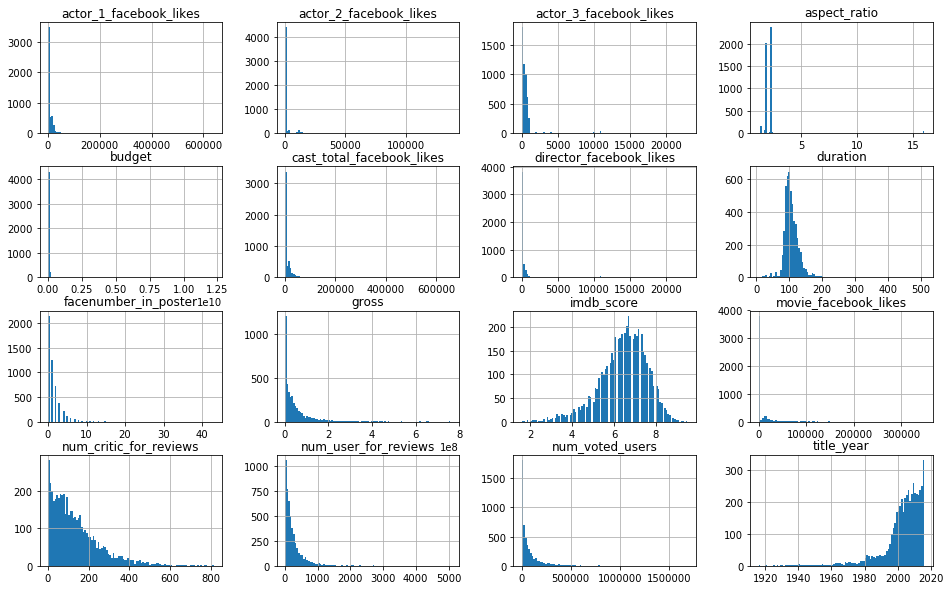

In [44]:
movie_metadata.hist(bins=100, figsize=(16,10));

In [561]:
## Final dataset - integrate
# (2) The Movies Database dataset 50k movies
    # cast, crew, movie data
    # TMB_credits
        # sparse: cast, crew
    # TMB_keywords
        # sparse: keywords
    # TMB_movies_metadata
    # TMB_movie_ratings    
# (3) latest update Media Lens set
    # tags, ratings, genres
# (1) PERSONALITY DATASET
    # ratings/individual personality big 5 x ratings
# (6) serendipity-sac2018
    # +tags/tag_genomes
    # SER_answers_by_movieId
    # SER_movie_ratings
# (7) learning-from-sets-2019
    # ratings on movies/sets of 5 movies
    # LEARN_movie_ratings
## MIGHT HAVE TO DROP THIS LAST -> they said YES!
# (8) hetrec2011-movielens-2k-v2
    # rotten tomatoes data (and movie locations!)

    
# sparsity problem:
# tags, cast, crew, 
    
    
## Could notionally augment with the-numbers.com data

# not a lot of value-added

# Domestic, International, Worldwide Box Office
# Est. Domestic DVD Sales, Blu-ray Sales, Total
# Production Budget
# Domestic, International, Video Release
# MPAA Rating
# Running Time
# Franchise
# Keywords
# Source
# Genre
# Production Method
# Creative Type
# Production Companies
# Production Countries


# https://grouplens.org/datasets/movielens/latest/
# https://www.kaggle.com/rounakbanik/the-movies-dataset


# All datasets can be reconciled on movieId
# userId we can expect to only be consistent within each set



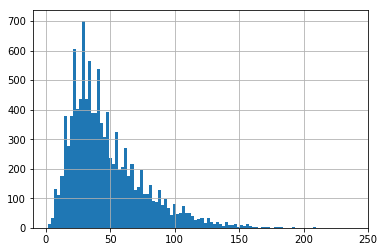

In [19]:
## (6) serendipity-sac2018
# https://grouplens.org/datasets/serendipity-2018/

dataset = "serendipity-sac2018"

# userId,movieId (3840, 2)
SER_recommendations = pd.read_csv(Dataset_directory+ dataset +os.sep+"recommendations.csv")

# userId,movieId,rating,timestamp,predictedRating,s1,s2,s3,s4,s5,s6,s7,s8,q,
# s_ser_rel,s_ser_find,s_ser_imp,s_ser_rec,m_ser_rel,m_ser_find,m_ser_imp,m_ser_rec (3840, 2)
# survey likert questions about 'serendipitous' (generally unpopular but they like) movies
# and then some inferred binary variables based on those answers
SER_answers = pd.read_csv(Dataset_directory+ dataset +os.sep+"answers.csv")

# ORIGINAL CSV HAS PROBLEMS (don't story comma separated list within "" ... and then *also* use "" for Jed "nickname" Jones)
# it's only 5-6 entries - manual fix is fine
# movieId,title,releaseDate,directedBy,starring,imdbId,tmdbId,genres (49174, 8)
# -> movieId,title,releaseDate,imdbId,tmdbId (good for identifying)
# genres -> comma separated string list
# starring -> comma separated string list
# directedBy -> comma separated string list
SER_movies = pd.read_csv(Dataset_directory+ dataset +os.sep+"movies.csv") # movieId is unique

# userId,movieId,tag,timestamp (628157, 4)
SER_tags = pd.read_csv(Dataset_directory+ dataset +os.sep+"tags.csv")

# userId,movieId,rating,timestamp (9997850, 4)
SER_training = pd.read_csv(Dataset_directory+ dataset +os.sep+"training.csv")

# movieId,tag,relevance (12413640, 3)
SER_tag_genome = pd.read_csv(Dataset_directory+ dataset +os.sep+"tag_genome.csv")





# pick the most relevant tags/tags above certain relevance
SER_tag_genome[ SER_tag_genome["relevance"]>.5 ].groupby('movieId').count()["tag"].hist(bins=100)


SER_answers_by_movieId = SER_answers.groupby("movieId").mean().drop(["userId","timestamp"],axis=1)
SER_answers_by_movieId["n"] = SER_answers.groupby('movieId').count()["userId"]

SER_movie_ratings = SER_training[["movieId","rating"]].groupby("movieId").apply(lambda x: [x["rating"].count(), x["rating"].mean(), x["rating"].std()])
SER_movie_ratings = SER_movie_ratings.apply(pd.Series)
SER_movie_ratings.columns = ["n","ratings_mean","ratings_std"]
SER_movie_ratings["n"] = SER_movie_ratings["n"].astype('int')

In [131]:
# SER_movies["directedBy"] 1462 nulls
SER_movies["directedBy"].isnull().sum()

1462

In [149]:
num_genres = SER_movies["genres"].apply(lambda x: len(x.split(",")) if pd.notnull(x) else np.nan)
genres_list = SER_movies["genres"].apply(lambda x: x.split(",") if pd.notnull(x) else np.nan)

SER_movies["genres_list"] = genres_list
SER_movies["num_genres"] = num_genres

num_genres.value_counts()

1.0     19471
2.0     14720
3.0      8394
4.0      2492
5.0       637
6.0       118
7.0        24
8.0         5
10.0        1
Name: genres, dtype: int64

In [150]:
num_starring = SER_movies["starring"].apply(lambda x: len(x.split(",")) if pd.notnull(x) else np.nan)
starring_list = SER_movies["starring"].apply(lambda x: x.split(",") if pd.notnull(x) else np.nan)

SER_movies["starring_list"] = starring_list
SER_movies["num_starring"] = num_starring

num_starring.value_counts()

5.0     18272
4.0      9777
3.0      5848
2.0      2250
6.0      2117
1.0      2092
7.0      1261
8.0       885
9.0       622
10.0      479
11.0      395
12.0      320
13.0      251
15.0      216
14.0      196
16.0      104
17.0      101
18.0       91
20.0       54
19.0       53
21.0       51
22.0       29
24.0       24
23.0       18
29.0       16
25.0       15
26.0       14
28.0       13
27.0       12
30.0       10
31.0        7
32.0        6
35.0        4
36.0        3
41.0        3
37.0        2
40.0        2
33.0        2
57.0        2
34.0        2
38.0        1
70.0        1
52.0        1
45.0        1
65.0        1
42.0        1
47.0        1
51.0        1
Name: starring, dtype: int64

In [148]:
num_directors = SER_movies["directedBy"].apply(lambda x: len(x.split(",")) if pd.notnull(x) else np.nan)
director_list = SER_movies["directedBy"].apply(lambda x: x.split(",") if pd.notnull(x) else np.nan)

SER_movies["director_list"] = director_list
SER_movies["num_directors"] = num_directors

num_directors.value_counts()

1.0     45814
2.0      1600
3.0       167
4.0        45
5.0        23
7.0        19
6.0        16
8.0         8
11.0        4
9.0         3
10.0        3
13.0        2
26.0        2
15.0        1
36.0        1
25.0        1
27.0        1
12.0        1
30.0        1
Name: directedBy, dtype: int64

In [134]:
SER_movies[num_directors>=30]

,movieId,title,releaseDate,directedBy,starring,imdbId,tmdbId,genres
14736,70927,To Each His Own Cinema (Chacun son cinéma ou C...,2007-05-20,"Theodoros Angelopoulos, Olivier Assayas, Bille...","Isabelle Adjani, Anouk Aimée, Taraneh Alidoost...",973844,36108.0,"Comedy,Drama"
25819,117312,The ABCs of Death 2 (2014),2014-10-02,"Rodney Ascher,Julian Barratt,Robert Boocheck,A...","Tristan Risk,Martina García,Béatrice Dalle",2926810,193726.0,"Comedy,Horror"


In [140]:
# title 2 nulls, format = <title> (year), 94 instances of two movies with same name/year combo
# Some are credible  - two films in 2005 called Chaos is, I think, true
# Some are not - The Face of Fu Manchu (1965)x2?
SER_movies["title"].isnull().sum()
SER_movies["title"].value_counts()[SER_movies["title"].value_counts()>=2]

Chaos (2005)                                       2
Delirium (2014)                                    2
Grace (2014)                                       2
Stranded (2015)                                    2
Windwalker (1980)                                  2
Boss Nigger (1975)                                 2
The Choirboys (1977)                               2
Band of Brothers (2001)                            2
Not Quite Human (1987)                             2
Office (2015)                                      2
Cowboys & Angels (2003)                            2
Sing (2016)                                        2
Hamlet (2000)                                      2
The Forest (2016)                                  2
Lady Snowblood 2: Love Song of Vengeance (1974)    2
Veronica (2017)                                    2
The Face of Fu Manchu (1965)                       2
Seven Years Bad Luck (1921)                        2
Mini's First Time (2006)                      

In [153]:

# tag genome - need to think about how to do that!
# not finished - some cleaning/prep still required
SER_movies.to_csv(Dataset_directory+"Processed"+os.sep+"SER_movies"+".csv")

SER_answers_by_movieId.to_csv(Dataset_directory+"Processed"+os.sep+"SER_answers_by_movieId"+".csv")

SER_movie_ratings.to_csv(Dataset_directory+"Processed"+os.sep+"SER_movie_ratings"+".csv")



In [147]:
# releaseDate no nulls!
releaseDates = pd.to_datetime(SER_movies["releaseDate"]).apply(lambda x: x.date())
## you'll have to look up the code for YYYY-MM-DD

In [128]:
SER_answers_by_movieId

rating               0
predictedRating     17
s1                  68
s2                 520
s3                  52
s4                  20
s5                  15
s6                  63
s7                  16
s8                  26
q                    0
s_ser_rel            0
s_ser_find           0
s_ser_imp            0
s_ser_rec            0
m_ser_rel            0
m_ser_find           0
m_ser_imp            0
m_ser_rec            0
n                    0
dtype: int64

In [108]:
## (7) learning-from-sets-2019
# https://grouplens.org/datasets/learning-from-sets-of-items-2019/
# For this paper: https://www.thinkmind.org/download.php?articleid=eknow_2017_4_10_68011

dataset = "learning-from-sets-2019"

# userId,movieId_1,movieId_2,movieId_3,movieId_4,movieId_5,rating,timestamp (29516, 8)
LEARN_set_ratings = pd.read_csv(Dataset_directory+ dataset +os.sep+"set_ratings.csv")

# userId,movieId,rating,timestamp (458970, 4)
LEARN_item_ratings = pd.read_csv(Dataset_directory+ dataset +os.sep+"item_ratings.csv")


LEARN_movie_ratings = LEARN_item_ratings[["movieId","rating"]].groupby("movieId").apply(lambda x: [x["rating"].count(), x["rating"].mean(), x["rating"].std()])
LEARN_movie_ratings = LEARN_movie_ratings.apply(pd.Series)
LEARN_movie_ratings.columns = ["n","ratings_mean","ratings_std"]


In [151]:
LEARN_movie_ratings["n"] = LEARN_movie_ratings["n"].astype('int')
LEARN_movie_ratings.to_csv(Dataset_directory+"Processed"+os.sep+"LEARN_movie_ratings"+".csv")

In [6]:
## (8) hetrec2011-movielens-2k-v2
# https://grouplens.org/datasets/hetrec-2011/
# MovieLens + IMDb/Rotten Tomatoes

# Some restrictions on commercial use -> Have sent them a begging letter!

dataset = "hetrec2011-movielens-2k-v2"

# movieID,actorID,actorName,ranking (231742, 4)
HETREC_movie_actors = pd.read_csv(Dataset_directory+ dataset +os.sep+"movie_actors.dat", sep=r'\t', engine='python')

# movieID,country (10197, 2)
HETREC_movie_countries = pd.read_csv(Dataset_directory+ dataset +os.sep+"movie_countries.dat", sep=r'\t', engine='python')

# movieID,directorID,directorName (10155, 3)
HETREC_movie_directors = pd.read_csv(Dataset_directory+ dataset +os.sep+"movie_directors.dat", sep=r'\t', engine='python')

# movieID,genre (20809, 2)
HETREC_movie_genres = pd.read_csv(Dataset_directory+ dataset +os.sep+"movie_genres.dat", sep=r'\t', engine='python')

# movieID,location1,location2,location3,location4 (49167, 5)
HETREC_movie_locations = pd.read_csv(Dataset_directory+ dataset +os.sep+"movie_locations.dat", sep=r'\t', engine='python')

# movieID,tagID,tagWeight (51795, 3)
HETREC_movie_tags = pd.read_csv(Dataset_directory+ dataset +os.sep+"movie_tags.dat", sep=r'\t', engine='python')

# id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,
# rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,
# rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,
# rtAudienceScore,rtPictureURL (10197, 21)
HETREC_movies = pd.read_csv(Dataset_directory+ dataset +os.sep+"movies.dat", sep=r'\t', engine='python')

# id,value (13222, 2)
HETREC_tags = pd.read_csv(Dataset_directory+ dataset +os.sep+"tags.dat", sep=r'\t', engine='python')

# userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second (855598, 9)
HETREC_user_ratedmovies = pd.read_csv(Dataset_directory+ dataset +os.sep+"user_ratedmovies.dat", sep=r'\t', engine='python')

# userID,movieID,rating,timestamp (855598, 4)
HETREC_user_ratedmovies_timestamps = pd.read_csv(Dataset_directory+ dataset +os.sep+"user_ratedmovies-timestamps.dat", sep=r'\t', engine='python')

# userID,movieID,tagID,date_day,date_month,date_year,date_hour,date_minute,date_second (47957, 9)
HETREC_user_taggedmovies = pd.read_csv(Dataset_directory+ dataset +os.sep+"user_taggedmovies.dat", sep=r'\t', engine='python')

# userID,movieID,tagID,timestamp (47957, 4)
HETREC_user_taggedmovies_timestamps = pd.read_csv(Dataset_directory+ dataset +os.sep+"user_taggedmovies-timestamps.dat", sep=r'\t', engine='python')



In [305]:
# HETREC_movie_countries -> add to HETREC_movies
# HETREC_movie_directors -> add to HETREC_movies

HETREC_movie_countries.columns

Index(['movieID', 'country'], dtype='object')

In [7]:
# HETREC_user_ratedmovies_timestamps.groupby("movieId")
HETREC_user_ratings = HETREC_user_ratedmovies_timestamps[["movieID","rating"]].groupby("movieID").apply(lambda x: [x["rating"].count(), x["rating"].mean(), x["rating"].std()])
# ML_movie_ratings = ML_ratings[["movieId","rating"]].groupby("movieId").apply(lambda x: [x["rating"].count(), x["rating"].mean(), x["rating"].std()])
HETREC_user_ratings = HETREC_user_ratings.apply(pd.Series)
HETREC_user_ratings.columns = ["n","ratings_mean","ratings_std"]
HETREC_user_ratings['n'] = HETREC_user_ratings['n'].astype('int')

In [15]:
print( len( intersection( HETREC_movie_countries["movieID"], HETREC_movies["id"] ) ) ,
       HETREC_movie_countries.shape, HETREC_movies.shape )
HETREC_movies.index = HETREC_movies["id"]
HETREC_movie_countries.index = HETREC_movie_countries["movieID"]
HETREC_movies["country"] = HETREC_movie_countries["country"]

10197 (10197, 2) (10197, 21)


In [17]:
HETREC_movie_directors.index = HETREC_movie_directors["movieID"]
HETREC_movies[["directorID","directorName"]] = HETREC_movie_directors[["directorID","directorName"]]

In [176]:
# HETREC_movie_actors (231742, 4)
# movieID 10174 unique
# actorID 95321 unique
# actorName 95241 unique
# ranking 1-220 per movie unique ranking ("order")

# HETREC_movie_actors["ranking"].value_counts()

In [181]:
# HETREC_movie_countries (10197, 2) -> movieID unique

# HETREC_movie_countries["country"].value_counts() USA>UK>France>Canada ...

In [183]:
# HETREC_movie_directors

# moviedId -> directorID -> directorName

In [185]:
# HETREC_movie_genres
# movieId =1 -> Drama
# movieId =1 -> Comedy
# movieId =2 -> Drama
HETREC_movie_genres["genre"].value_counts()
# IMAX and Short are genres?

Drama          5076
Comedy         3566
Thriller       1664
Romance        1644
Action         1445
Crime          1086
Adventure      1003
Horror          978
Sci-Fi          740
Fantasy         535
Children        519
Mystery         497
War             494
Documentary     430
Musical         421
Animation       279
Western         261
Film-Noir       145
IMAX             25
Short             1
Name: genre, dtype: int64

In [1]:
# HETREC_movie_locations
# multiple locations for single movies
# a lot of Nones!
# all 10197 movies covered
# HETREC_movie_locations#["movieID"].value_counts()#["location1"].value_counts()

# HETREC_movie_locations[["location1","location2","location3","location4"]].shape
# (49167, 4) location sets
# HETREC_movie_locations[["location1","location2","location3","location4"]].drop_duplicates().shape
# dup removed (17127, 4)

In [207]:
# HETREC_movie_tags  (51795, 3) ['movieID', 'tagID', 'tagWeight']
# 7155 unique movies
# 5297 unique tags
# tagWeight (1-42), mostly 1
# HETREC_movie_tags["tagWeight"].value_counts()

In [213]:
HETREC_movies.describe()

,id,imdbID,year
count,10197.000000,1.019700e+04,10197.000000
mean,12852.741002,2.021885e+05,1988.251643
std,17431.004896,2.071287e+05,18.688734
min,1.000000,4.390000e+02,1903.000000
25%,2780.000000,8.220000e+04,1981.000000
50%,5421.000000,1.130570e+05,1995.000000
75%,8664.000000,2.817240e+05,2002.000000
max,65133.000000,1.349938e+06,2011.000000


In [218]:
HETREC_movies.drop(["id","imdbID","year"],axis=1).describe(include = 'all')

,title,spanishTitle,imdbPictureURL,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
count,10197,10197,10016,9886,10197,10197,10197,10197,10197,10197,10197,10197,10197,10197,10197,10197,10197,10197
unique,9407,9357,9221,9134,86,244,205,150,101,82,49,44,39,98,34,5087,89,9152
top,Hamlet,Hamlet,http://ia.media-imdb.com/images/M/MV5BMTM5NjMz...,1075422-hamlet,0,0,0,0,0,0,0,0,0,0,0,0,0,\N
freq,6,6,6,6,1526,655,1050,1555,1053,5305,2461,3530,3951,3530,2622,2622,2625,230


In [214]:
HETREC_movies.shape

(10197, 21)

In [219]:
# HETREC_movies.isnull().sum()
# imdbPictureURL 181 nulls
# rtID 311 nulls
# id unique
# imdbID -> not unique
# rtID -> not unique

In [220]:
HETREC_movies.columns

Index(['id', 'title', 'imdbID', 'spanishTitle', 'imdbPictureURL', 'year',
       'rtID', 'rtAllCriticsRating', 'rtAllCriticsNumReviews',
       'rtAllCriticsNumFresh', 'rtAllCriticsNumRotten', 'rtAllCriticsScore',
       'rtTopCriticsRating', 'rtTopCriticsNumReviews', 'rtTopCriticsNumFresh',
       'rtTopCriticsNumRotten', 'rtTopCriticsScore', 'rtAudienceRating',
       'rtAudienceNumRatings', 'rtAudienceScore', 'rtPictureURL'],
      dtype='object')

In [249]:
numerical_cols = ['rtAllCriticsRating', 'rtAllCriticsNumReviews',
       'rtAllCriticsNumFresh', 'rtAllCriticsNumRotten', 'rtAllCriticsScore',
       'rtTopCriticsRating', 'rtTopCriticsNumReviews', 'rtTopCriticsNumFresh',
       'rtTopCriticsNumRotten', 'rtTopCriticsScore', 'rtAudienceRating',
       'rtAudienceNumRatings', 'rtAudienceScore']
HETREC_movies[numerical_cols][0:10].dtypes

rtAllCriticsRating        object
rtAllCriticsNumReviews    object
rtAllCriticsNumFresh      object
rtAllCriticsNumRotten     object
rtAllCriticsScore         object
rtTopCriticsRating        object
rtTopCriticsNumReviews    object
rtTopCriticsNumFresh      object
rtTopCriticsNumRotten     object
rtTopCriticsScore         object
rtAudienceRating          object
rtAudienceNumRatings      object
rtAudienceScore           object
dtype: object

In [262]:
# "\\N" appears to be the code for nan (maybe in same 230??)

# imdbPictureURL -> full url for jpg, not unique
# rtPictureURL -> \\N for 230, post_default for 57, otherwise similar non-unique pattern

# rtId -> string id, similar-but-not-identical pattern of not-uniqueness
# rtAllCriticsRating -> 0 is very common, \\N also present (0.0-9.5999)
# rtAllCriticsNumReviews -> integers
# rtAllCriticsNumFresh -> integers how many gave a "fresh" rating
# rtAllCriticsNumRotten -> integers how many gave a "rotten" rating (skewed v against!)
# rtTopCriticsScore -> integer score 0-100 (lot of 0s!)
# rtAudienceRating -> float 0.0-5.0 (lot of 0s!)
# rtAudienceNumRatings-> integers lotof 0s!
# rtAudienceScore -> integeers 0-100, lot of 0s!
# HETREC_movies["rtAudienceNumRatings"].value_counts()
# HETREC_movies["rtAudienceRating"].replace("\\N",np.nan).astype('float').max()


In [255]:
HETREC_movies[numerical_cols] = HETREC_movies[numerical_cols].replace("\\N",np.nan).apply(lambda x: pd.to_numeric(x))

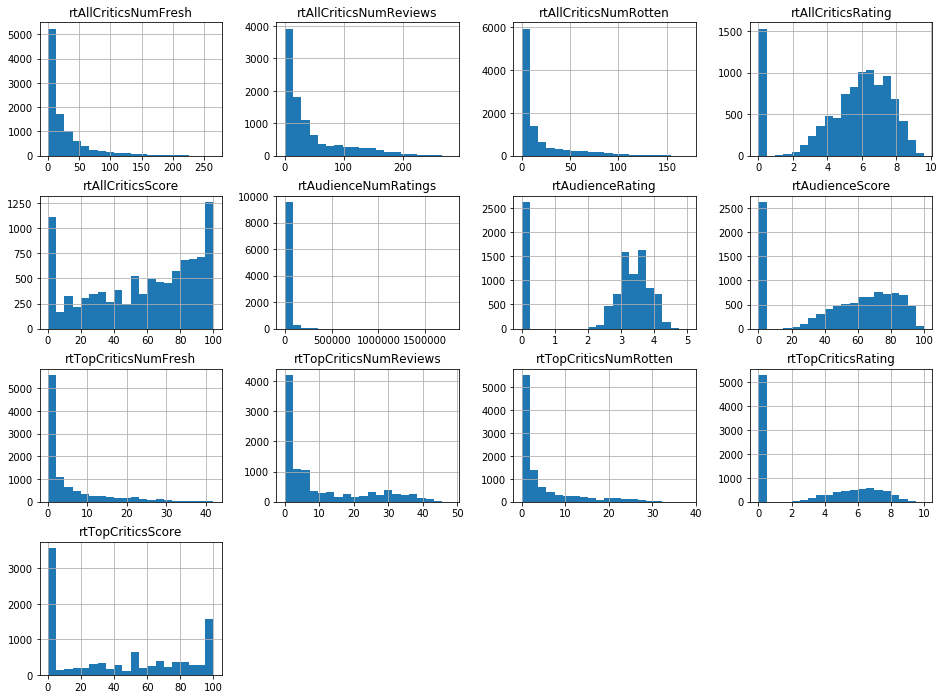

In [259]:
HETREC_movies[numerical_cols].hist(bins=20,figsize=(16,12));

In [263]:
numerical_cols

['rtAllCriticsRating',
 'rtAllCriticsNumReviews',
 'rtAllCriticsNumFresh',
 'rtAllCriticsNumRotten',
 'rtAllCriticsScore',
 'rtTopCriticsRating',
 'rtTopCriticsNumReviews',
 'rtTopCriticsNumFresh',
 'rtTopCriticsNumRotten',
 'rtTopCriticsScore',
 'rtAudienceRating',
 'rtAudienceNumRatings',
 'rtAudienceScore']

In [ ]:
rtAllCriticsNoReviews = HETREC_movies["rtAllCriticsNumReviews"]==0.0
HETREC_movies["rtAllCriticsFracRotten"] = HETREC_movies["rtAllCriticsNumRotten"]/HETREC_movies["rtAllCriticsNumReviews"]
HETREC_movies.loc[rtAllCriticsNoReviews,"rtAllCriticsRating"] = np.nan
HETREC_movies.loc[rtAllCriticsNoReviews,"rtAllCriticsScore"] = np.nan
HETREC_movies.loc[rtAllCriticsNoReviews,"rtAllCriticsFracRotten"] = np.nan

rtTopCriticsNoReviews = HETREC_movies["rtTopCriticsNumReviews"]==0.0
HETREC_movies["rtTopCriticsFracRotten"] = HETREC_movies["rtTopCriticsNumRotten"]/HETREC_movies["rtTopCriticsNumReviews"]
HETREC_movies.loc[rtTopCriticsNoReviews,"rtTopCriticsRating"] = np.nan
HETREC_movies.loc[rtTopCriticsNoReviews,"rtTopCriticsScore"] = np.nan
HETREC_movies.loc[rtTopCriticsNoReviews,"rtTopCriticsFracRotten"] = np.nan

rtAudienceNoRatings = HETREC_movies["rtAudienceNumRatings"]==0.0
# HETREC_movies["rtTopCriticsFracRotten"] = HETREC_movies["rtTopCriticsNumRotten"]/HETREC_movies["rtTopCriticsNumReviews"]
HETREC_movies.loc[rtAudienceNoRatings,"rtAudienceRating"] = np.nan
HETREC_movies.loc[rtAudienceNoRatings,"rtAudienceScore"] = np.nan
# HETREC_movies["rtTopCriticsFracRotten"][rtAudienceNoRatings] = np.nan

HETREC_movies.loc[ HETREC_movies["rtAllCriticsRating"]==0.0 , "rtAllCriticsRating"] = np.nan
HETREC_movies.loc[ HETREC_movies["rtTopCriticsRating"]==0.0 , "rtTopCriticsRating"] = np.nan

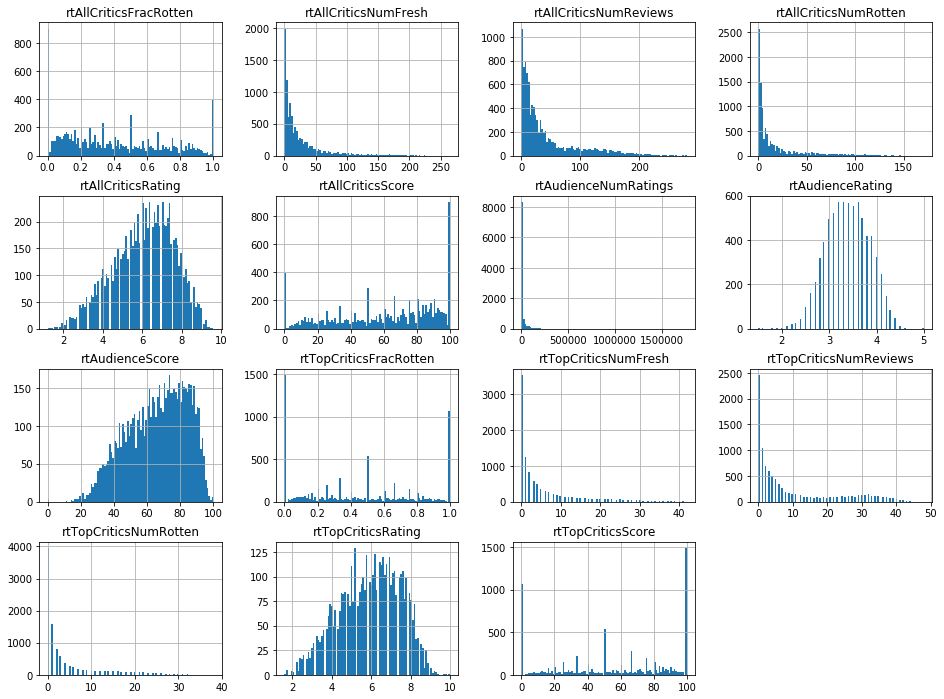

In [279]:
# numerical_cols = numerical_cols + ["rtAllCriticsFracRotten","rtTopCriticsFracRotten"]
HETREC_movies[numerical_cols + ["rtAllCriticsFracRotten","rtTopCriticsFracRotten"]].hist(bins=100,figsize=(16,12));

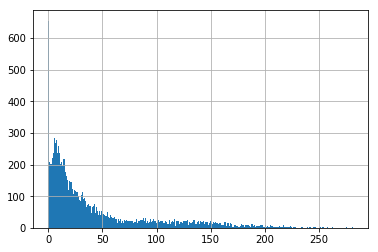

In [290]:
HETREC_movies["rtAllCriticsNumReviews"].hist( bins=int( HETREC_movies["rtAllCriticsNumReviews"].max() ) );

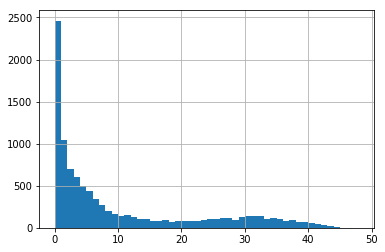

In [291]:
HETREC_movies["rtTopCriticsNumReviews"].hist( bins=int( HETREC_movies["rtTopCriticsNumReviews"].max() ) );

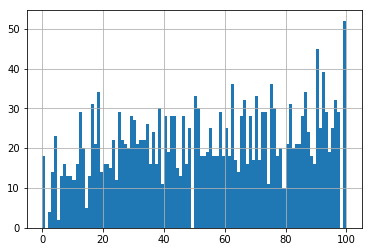

In [299]:
HETREC_movies[ HETREC_movies["rtTopCriticsNumReviews"] >20]["rtTopCriticsScore"].hist(bins=int(HETREC_movies["rtTopCriticsScore"].max()));

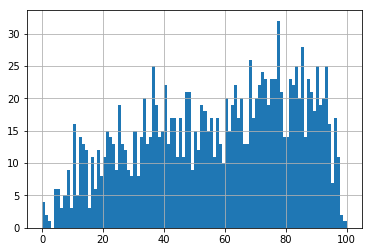

In [286]:
HETREC_movies[ HETREC_movies["rtAllCriticsNumReviews"] >100]["rtAllCriticsScore"].hist(bins=100);

# HETREC_movies[ [ x for x in numerical_cols if "CriticsScore" in x ] ]

In [20]:
# HETREC_movies[["rtTopCriticsRating","rtTopCriticsNumReviews",'rtTopCriticsNumRotten','rtTopCriticsScore']][HETREC_movies["rtTopCriticsRating"]==0.0]

In [ ]:
## ditch all 0.0s on rating variables

In [24]:
# HETREC_movies

In [23]:
HETREC_movies.to_csv(Dataset_directory+"Processed"+os.sep+"HETREC_movies"+".csv")
HETREC_user_ratings.to_csv(Dataset_directory+"Processed"+os.sep+"HETREC_user_ratings"+".csv")

In [8]:
## (2) The Movies Database dataset 50k movies

dataset = "The_Movies_Dataset"

# cast, crew, id (45476, 3)
# cast -> cast_id,character,credit_id,gender,id,name,order,profile_path
# crew -> credit_id,department,gender,id,job,name,profile_path
TMB_credits = pd.read_csv(Dataset_directory+ dataset +os.sep+"credits.csv")

# id, keywords (46419, 2)
# keywords -> id,name
TMB_keywords = pd.read_csv(Dataset_directory+ dataset +os.sep+"keywords.csv")

# movieId, imdbId, tmdbId (45843, 3)
TMB_links = pd.read_csv(Dataset_directory+ dataset +os.sep+"links.csv")

# movieId, imdbId, tmdbId (9125, 3)
TMB_links_small = pd.read_csv(Dataset_directory+ dataset +os.sep+"links_small.csv")

# adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,
# poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,
# title,video,vote_average,vote_count (45466, 24)

# neither id or imdb_id is unique!

# genres -> id,name
# production_companies -> id,name
# production_countries -> iso_3166_1,name
# spoken_languages -> iso_639_1,name
# problems with this dataset
#    errant line-feed in the middle of tagline for row 29572
#    ""  19763
#    ""  35669 "Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche"
TMB_movies_metadata = pd.read_csv(Dataset_directory+ dataset +os.sep+"movies_metadata.csv")

# problem with duplicates
TMB_movies_metadata.drop_duplicates(inplace=True)
# problem with near-duplicates (diff on "popularity" and "vote_count")
non_trivial_duplicate_ids = TMB_movies_metadata.drop_duplicates()["id"].value_counts()[TMB_movies_metadata.drop_duplicates()["id"].value_counts()>=2].index
df_dups = TMB_movies_metadata[ TMB_movies_metadata["id"].apply(lambda x: x in non_trivial_duplicate_ids) ][["id","vote_count","popularity"]].sort_values(by="id")
df_fix_dups = df_dups.groupby("id").apply(lambda x: [x.index[:-1],x.index[-1],x["vote_count"].max(), x["popularity"].mean()]).apply(lambda x: pd.Series(x))
df_fix_dups.columns = ["indices_to_remove","index_to_keep_and_update","vote_count","popularity"]

for row_ind in df_fix_dups.index:
    for remove_index in df_fix_dups.loc[row_ind,"indices_to_remove"]:
        TMB_movies_metadata.drop(remove_index, inplace=True)

    index_to_keep_and_update = df_fix_dups.loc[row_ind,"index_to_keep_and_update"]
    TMB_movies_metadata.loc[ index_to_keep_and_update,["vote_count","popularity"]]  = df_fix_dups.loc[row_ind,["vote_count","popularity"]]


# userId,movieId,rating,timestamp (26024289, 4)
TMB_ratings = pd.read_csv(Dataset_directory+ dataset +os.sep+"ratings.csv")
# userId,movieId,rating,timestamp (45466, 24)
TMB_ratings_small = pd.read_csv(Dataset_directory+ dataset +os.sep+"ratings_small.csv")

In [10]:
# lot of small problems with this dataset!
# ids not reliable
# these two imdbIds were also definitely wrong
TMB_links_small.loc[ TMB_links_small["imdbId"].apply(lambda x: x in [81846,185906]), "imdbId" ]=np.nan

TMB_links_amalgamated = TMB_links.append(TMB_links_small).drop_duplicates().copy()
# TMB_links_amalgamated.isnull().sum()

TMB_links_amalgamated[ TMB_links_amalgamated["imdbId"].isnull() ]
# 7502 and 77658 throw an error for the movieId website
# https://movielens.org/movies/77658

# doesn't appear in the movie database either
# https://www.themoviedb.org/movie/191903-band-of-brothers -> band of brothers ... but broken
# https://www.themoviedb.org/movie/205300 -> just plain broken

TMB_links_amalgamated.drop([5173,7527],inplace=True)
TMB_links_amalgamated["imdbId"] = TMB_links_amalgamated["imdbId"].astype('int')

# TMB_links_amalgamated.isnull().sum()

drop_indices = [13446, 16880, 5574, 9378, 29684, 20100, 14023, 16278, 848, 20065, 12131, 45641, 13676, 34144, 2594, 11217, 45197, 33499, 21093, 14089, 9215, 15871, 4390, 1485, 15165, 17350, 14077, 9631, 34061, 13289]
TMB_links_amalgamated.loc[drop_indices,"tmdbId"] = np.nan

In [11]:
tmdb_to_imdb = TMB_movies_metadata[["id","imdb_id"]].copy()
tmdb_to_imdb["imdb_id"] = tmdb_to_imdb["imdb_id"].apply(lambda x: int(str(x)[2:]) if isinstance(x,str) else np.nan)
tmdb_to_imdb.loc[TMB_movies_metadata["imdb_id"].isnull(),"imdb_id"]= TMB_movies_metadata[["id","imdb_id"]][TMB_movies_metadata["imdb_id"].isnull()]["id"].apply(lambda x: TMB_links[TMB_links["tmdbId"]==x]["imdbId"].values[0])
tmdb_to_imdb["imdb_id"] = tmdb_to_imdb["imdb_id"].astype(int)
tmdb_to_imdb.isnull().sum()
# no duplicate values

id         0
imdb_id    0
dtype: int64

In [12]:
imdb_match_in_both_sets = TMB_links_amalgamated["imdbId"].apply(lambda x: x in tmdb_to_imdb["imdb_id"].values)
TMB_links_amalgamated.loc[imdb_match_in_both_sets,"tmdbId"] = TMB_links_amalgamated[imdb_match_in_both_sets]["imdbId"].apply(lambda x: tmdb_to_imdb[tmdb_to_imdb["imdb_id"]==x]["id"].values[0])

In [13]:
TMB_links_amalgamated.isnull().sum()

movieId      0
imdbId       0
tmdbId     246
dtype: int64

In [101]:
# duplicated_tmbIds = TMB_links_amalgamated["tmdbId"].value_counts()[TMB_links_amalgamated["tmdbId"].value_counts()>=2].index
# duplicated_tmbIds= duplicated_tmbIds.astype('int')
# len( duplicated_tmbIds )
# # all in the actual

In [87]:
# df = TMB_links_amalgamated.reset_index().dropna().astype(int)

# ML_movies_indexed_by_movieId = ML_movies.set_index('movieId').copy()
# TMB_movies_metadata_indexed_by_tmdbId = TMB_movies_metadata.set_index("id").copy()

# df["movieId_title"] = df["movieId"].apply(lambda x: ML_movies_indexed_by_movieId.loc[x]["title"] if (x in ML_movies_indexed_by_movieId.index) else np.nan)
# df["tmdbId_title"] = df["tmdbId"].apply(lambda x: TMB_movies_metadata_indexed_by_tmdbId.loc[x]["title"] if (x in TMB_movies_metadata_indexed_by_tmdbId.index) else np.nan)

# SER_movies_indexed_by_movieId = SER_movies.set_index("movieId").copy()
# SER_movies_indexed_by_movieId.columns = SER_movies_indexed_by_movieId.columns+"_SER"
# SER_movies_indexed_by_movieId

# df["SER_cols"] = df["movieId"].apply(lambda x: SER_movies_indexed_by_movieId.loc[x].values if (x in SER_movies_indexed_by_movieId.index) else np.nan)


# df["TMB_cols"] = df["tmdbId"].apply(lambda x: TMB_movies_metadata_indexed_by_tmdbId.loc[x,['release_date','overview']].values if (x in TMB_movies_metadata_indexed_by_tmdbId.index) else np.nan)



In [1467]:
%%time
# 5mins
TMB_credits = pd.read_csv(Dataset_directory+ dataset +os.sep+"credits.csv")
TMB_credits["cast"] = TMB_credits["cast"].apply(lambda x: eval(x))
TMB_credits["crew"] = TMB_credits["crew"].apply(lambda x: eval(x))
TMB_credits = TMB_credits.reset_index()
# force unique id

# duplicates in the case
drop_these = [25957, 8068, 7345, 5865, 30013, 25893, 23533, 25954, 25955, 13603, 13946, 5130, 24843, 21853, 25895, 16764, 11155, 13220, 13375, 24163, 15074, 25950, 2564, 676, 5710, 29387, 25956, 23043, 40051, 25894, 9576, 15765, 16167, 25949, 5535, 25953, 12066, 4114, 14000, 25896]
# duplicates in the crew
drop_these = drop_these+[25892, 21164, 25897, 25891]
TMB_credits.drop(drop_these, inplace=True)


TMB_crew = pd.concat(TMB_credits.apply(lambda ser1: pd.DataFrame.from_dict([{**x, **{'TMB_credits_index': ser1["index"]}} for x in ser1["crew"]])
                            , axis=1).values, sort=False)
# only bug I can see - name reversed just once!
TMB_crew.loc[ TMB_crew["name"]  =="Ka-Fai Cheung","name"] = "Cheung Ka-Fai"

TMB_cast = pd.concat(TMB_credits.apply(lambda ser1: pd.DataFrame.from_dict([{**x, **{'TMB_credits_index': ser1["index"]}} for x in ser1["cast"]])
                            , axis=1).values, sort=False)
TMB_cast = TMB_cast.reset_index().drop("index",axis=1)


Wall time: 5min 2s


In [1468]:
%%time
### some 
TMB_crew.loc[ TMB_crew["id"]==1551219 ,"gender"] = 1 # Sally Boldt gender
TMB_crew.loc[ TMB_crew["id"]==1785844 ,"gender"] = 2# Peter Malota gender
TMB_crew.loc[ TMB_crew["id"]==56865, "profile_path"] = "/ZDOz1rqR5BijJlfBVW3stcWlwr.jpg"# Fruit Chan profile_path

TMB_crew_individuals = TMB_crew[["id","name","gender","profile_path"]].drop_duplicates().copy()
TMB_crew_individuals = TMB_crew_individuals.sort_values(by="id")



credit_list = TMB_crew.groupby("id").apply(lambda x: x["credit_id"].values)
credit_number = TMB_crew.groupby("id").apply(lambda x: len(x["credit_id"]))

department_list = TMB_crew.groupby("id").apply(lambda x: x["department"].unique())
department_number = TMB_crew.groupby("id").apply(lambda x: len(x["department"].unique()))

job_list = TMB_crew.groupby("id").apply(lambda x: x["job"].unique())
job_number = TMB_crew.groupby("id").apply(lambda x: len(x["job"].unique()))

TMB_crew_individuals["credit_list"] = credit_list.values
TMB_crew_individuals["credit_number"] = credit_number.values
TMB_crew_individuals["department_list"] = department_list.values
TMB_crew_individuals["department_number"] = department_number.values
TMB_crew_individuals["job_list"] = job_list.values
TMB_crew_individuals["job_number"] = job_number.values

TMB_crew["order"] = TMB_crew.index

max_order = TMB_crew.groupby("TMB_credits_index").apply(lambda x: x["order"].max())
TMB_crew["max_order"] = TMB_crew.apply(lambda x: max_order.loc[x["TMB_credits_index"]],axis=1)
TMB_crew["fractional_order"] = TMB_crew["order"]/TMB_crew["max_order"]
TMB_crew["fractional_order"] = TMB_crew["fractional_order"].replace(np.nan, 0) # special case where the crew is only 1 person!

mean_order = TMB_crew.groupby("id").apply(lambda x: x["order"].mean())
fractional_mean_order = TMB_crew.groupby("id").apply(lambda x: x["fractional_order"].mean())
order_list = TMB_crew.groupby("id").apply(lambda x: x["order"].values)

TMB_crew_individuals["mean_order"] = mean_order.values
TMB_crew_individuals["fractional_mean_order"] = fractional_mean_order.values
TMB_crew_individuals["order_list"] = order_list.values

Wall time: 4min 37s


In [1469]:
# make names consistent
TMB_cast.loc[TMB_cast["id"]==9779,"name"]="Morris Chestnut"
TMB_cast.loc[TMB_cast["id"]==132233,"name"]="Tony Schiena"
TMB_cast.loc[TMB_cast["id"]==117642,"name"]="Jason Momoa"
TMB_cast.loc[TMB_cast["id"]==111690,"name"]="Takako Matsu"
TMB_cast.loc[TMB_cast["id"]==99692,"name"]="Liao Fan"
TMB_cast.loc[TMB_cast["id"]==23764,"name"]="Erika Eleniak"

TMB_cast.loc[TMB_cast["id"]==58646,"name"]="Damian Chapa"
TMB_cast.loc[TMB_cast["id"]==67212,"name"]="Tom Wu"
TMB_cast.loc[TMB_cast["id"]==72932,"name"]="Ryuhei Matsuda"
TMB_cast.loc[TMB_cast["id"]==78456,"name"]="Kimbo Slice"
TMB_cast.loc[TMB_cast["id"]==78809,"name"]="Rashad Evans"
TMB_cast.loc[TMB_cast["id"]==87637,"name"]="Masami Nagasawa"
TMB_cast.loc[TMB_cast["id"]==87662,"name"]="Issei Takahashi"
TMB_cast.loc[TMB_cast["id"]==74947,"name"]="Kitty Zhang Yuqi"

# Semka Sokolović-Bertok gender female
TMB_cast.loc[TMB_cast["id"]==4644,"gender"]=1
# Corey Johnson gender male
TMB_cast.loc[TMB_cast["id"]==17199,"gender"]=2
# Miles Malleson gender male
TMB_cast.loc[TMB_cast["id"]==47395,"gender"]=2
# Tusse Silberg gender female
TMB_cast.loc[TMB_cast["id"]==70883,"gender"]=1
# Rashad Evans gender male
TMB_cast.loc[TMB_cast["id"]==78809,"gender"]=2
# Kan Tokumaru gender male
TMB_cast.loc[TMB_cast["id"]==114733 ,"gender"]=2
# Georgie Glen gender female
TMB_cast.loc[TMB_cast["id"]==191752,"gender"]=1
# Joe B. Barton gender male
TMB_cast.loc[TMB_cast["id"]==935841 ,"gender"]=2
# Aleksander Sewruk gender male
TMB_cast.loc[TMB_cast["id"]==1135277,"gender"]=2
# Xavier Morales gender male
TMB_cast.loc[TMB_cast["id"]==1608740 ,"gender"]=2
# Peter Malota gender male
TMB_cast.loc[TMB_cast["id"]==1785844,"gender"]=2

# Oliver Reed
TMB_cast.loc[TMB_cast["id"]==936,"profile_path"]="/we10IusqRV1NHRtA68ftyck2N33.jpg"
# Marisol Correa
TMB_cast.loc[TMB_cast["id"]==1634622,"profile_path"]="/xKFZXYUGZGZdiJSJOtEKhvMo7K2.jpg"
# Xavier Morales
TMB_cast.loc[TMB_cast["id"]==1608740,"profile_path"]="/cXb0xksR2SmuJEoUCOIr7NyBZRt.jpg"
# Mario De Candia
TMB_cast.loc[TMB_cast["id"]==1331602,"profile_path"]="/mkgLRMZHgQQ4PM8KbidOACnorSc.jpg"
# Duke Jackson
TMB_cast.loc[TMB_cast["id"]==1200780,"profile_path"]="/7Yn7BVgep48QNAf5cAjzMQl0a13.jpg"

# Aleksander Sewruk
TMB_cast.loc[TMB_cast["id"]==1135277,"profile_path"]="/prcO9VZBcQS4FhxATbVzDr1005A.jpg"
# Antonella Vitalea
TMB_cast.loc[TMB_cast["id"]==228167,"profile_path"]="/aPIAkjn75D1iYsgFJMvZ62WvMOx.jpg"
# Kim Kardashian
TMB_cast.loc[TMB_cast["id"]==212225,"profile_path"]="/xUZiyy7GNAJIp69tTiKxDbFqOOq.jpg"

# Zhou Dongyu
TMB_cast.loc[TMB_cast["id"]==145092,"profile_path"]="/fmR9dO5cxrcwk5bjENU4eNITgLi.jpg"
# Ted Markland
TMB_cast.loc[TMB_cast["id"]==136195,"profile_path"]="/orBobhJSFxq1TgRM9qKv0lJwV9v.jpg"

# Nigel Bruce
TMB_cast.loc[TMB_cast["id"]==3363,"profile_path"]="/kI8j8WGjDay9ovWnoTrqvcKYtN3.jpg"

# Susanne Zenor
TMB_cast.loc[TMB_cast["id"]==99888,"profile_path"]="/2ppMruL72FDz5Q0xIcGaFxwCDI6.jpg"
# Lilyan Tashman
TMB_cast.loc[TMB_cast["id"]==104018,"profile_path"]="/e1vaEiwuglqOYZXvbCX4KLgALeI.jpg"
# Takako Matsu
TMB_cast.loc[TMB_cast["id"]==111690,"profile_path"]="/xUZiyy7GNAJIp69tTiKxDbFqOOq.jpg"
# Juri Ueno
TMB_cast.loc[TMB_cast["id"]==115647,"profile_path"]="/ljEYwsNS5u9gtboxXSGQSopuFT2.jpg"
# Nello Mascia
TMB_cast.loc[TMB_cast["id"]==128045,"profile_path"]="/v8h4Ypnu6YVHKER3R4u3THdGAq.jpg"

df= TMB_cast.groupby("id").apply(lambda x: len( x["profile_path"].unique() )).sort_values(ascending=False)
name_duplicates = df[df>=2].index

id_profile_path_replace_list = TMB_cast.loc[TMB_cast.apply(lambda x: x["id"] in name_duplicates, axis=1)].sort_values(by="id").groupby("id").apply(lambda x: x["profile_path"].value_counts().index[0])

for index in id_profile_path_replace_list.index:
    TMB_cast.loc[TMB_cast["id"]==index,"profile_path"]=id_profile_path_replace_list[index]
    
# multiple Varvara Dvalishvili
TMB_cast.drop([145947, 145948, 145949, 145950, 145951, 145952] ,inplace=True)
# multiple Roshanak Gerami
TMB_cast.drop([374534, 374535, 374536, 374537, 374538] ,inplace=True)    

In [1470]:
%%time

TMB_cast_individuals = TMB_cast[["gender","id","name","profile_path"]].drop_duplicates().sort_values(by="id",ascending=True).copy()

credit_list = TMB_cast.groupby("id").apply(lambda x: x["credit_id"].values)
credit_number = TMB_cast.groupby("id").apply(lambda x: len(x["credit_id"]))

TMB_cast_individuals["credit_list"] = credit_list.values
TMB_cast_individuals["credit_number"] = credit_number.values


max_order = TMB_cast.groupby("TMB_credits_index").apply(lambda x: x["order"].max())
TMB_cast["max_order"] = TMB_cast.apply(lambda x: max_order.loc[x["TMB_credits_index"]],axis=1)
TMB_cast["fractional_order"] = TMB_cast["order"]/TMB_cast["max_order"]
TMB_cast["fractional_order"] = TMB_cast["fractional_order"].replace(np.nan, 0) # special case where the cast is only 1 person!

mean_order = TMB_cast.groupby("id").apply(lambda x: x["order"].mean())
fractional_mean_order = TMB_cast.groupby("id").apply(lambda x: x["fractional_order"].mean())
order_list = TMB_cast.groupby("id").apply(lambda x: x["order"].values)

TMB_cast_individuals["mean_order"] = mean_order.values
TMB_cast_individuals["fractional_mean_order"] = fractional_mean_order.values
TMB_cast_individuals["order_list"] = order_list.values


Wall time: 2min 35s


In [1476]:
%%time


TMB_credits["movieId"] = TMB_credits["id"].apply(lambda x: tmd_to_movie_id.loc[x])


TMB_credits_index_to_movieId = TMB_credits[["index","movieId"]].set_index("index")
TMB_crew["movieId"] =TMB_crew["TMB_credits_index"].apply(lambda x: TMB_credits_index_to_movieId.loc[x])
TMB_cast["movieId"] =TMB_cast["TMB_credits_index"].apply(lambda x: TMB_credits_index_to_movieId.loc[x])


TMB_cast = TMB_cast.drop(["name","gender","profile_path","TMB_credits_index"],axis=1)
TMB_crew = TMB_crew.drop(["name","gender","profile_path","TMB_credits_index"],axis=1)

TMB_crew.to_csv(Dataset_directory+"Processed"+os.sep+"TMB_crew"+".csv")
TMB_cast.to_csv(Dataset_directory+"Processed"+os.sep+"TMB_cast"+".csv")

TMB_crew_individuals.to_csv(Dataset_directory+"Processed"+os.sep+"TMB_crew_individuals"+".csv")
TMB_cast_individuals.to_csv(Dataset_directory+"Processed"+os.sep+"TMB_cast_individuals"+".csv")

In [500]:
TMB_crew["gender"].value_counts()
# 0: uncertain
# 1: female
# 2: male

0    272032
2    160711
1     31093
Name: gender, dtype: int64

In [529]:
TMB_crew_individuals["gender"].value_counts()

0    130109
2     25121
1      6345
Name: gender, dtype: int64

In [520]:
TMB_crew["department"].value_counts()
# Actors in here looks like a f***-up!

Production           94401
Writing              74759
Directing            58073
Sound                50548
Art                  40652
Camera               33506
Crew                 31572
Costume & Make-Up    30823
Editing              29795
Visual Effects       14842
Lighting              4846
Actors                  19
Name: department, dtype: int64

In [522]:
TMB_crew["job"].value_counts()

Director                          48999
Producer                          43507
Writer                            30398
Screenplay                        25143
Editor                            23770
Director of Photography           20640
Executive Producer                18853
Original Music Composer           15773
Casting                           12620
Art Direction                     11679
Costume Design                    11010
Production Design                 10524
Set Decoration                     7543
Music                              7333
Makeup Artist                      6400
Story                              5809
Novel                              5119
Script Supervisor                  4321
Cinematography                     4206
Camera Operator                    4123
Animation                          3828
Sound Re-Recording Mixer           3677
Associate Producer                 3592
Hairstylist                        3537
Co-Producer                        3182


Series([], Name: fractional_order, dtype: float64)

In [83]:
TMB_links_amalgamated.loc[45843] = [5269, 254686, 1791]
TMB_links_amalgamated.loc[45844] = [7880, 295743, 45044]
TMB_links_amalgamated.drop([4148, 8112, 45641, 29684, 34144, 34061],inplace=True)

tmd_to_movie_id = TMB_links_amalgamated.dropna().set_index('tmdbId')["movieId"].drop_duplicates()
# 219 nulls in index
TMB_credits["movieId"] = TMB_credits["id"].apply(lambda x: tmd_to_movie_id.loc[x])
# TMB_keywords["movieId"] =  TMB_keywords["id"].apply(lambda x: tmd_to_movie_id.loc[x])



TMB_movie_ratings = TMB_ratings.append(TMB_ratings_small)[["movieId","rating"]].groupby("movieId").apply(lambda x: [x["rating"].count(), x["rating"].mean(), x["rating"].std()])
TMB_movie_ratings = TMB_movie_ratings.apply(pd.Series)
TMB_movie_ratings.columns = ["n","ratings_mean","ratings_std"]
TMB_movie_ratings['n'] = TMB_movie_ratings['n'].astype('int')


In [1450]:
dataset = "The_Movies_Dataset"
# unpack keywords and add movieId
TMB_keywords = pd.read_csv(Dataset_directory+ dataset +os.sep+"keywords.csv")
TMB_keywords["movieId"] =  TMB_keywords["id"].apply(lambda x: tmd_to_movie_id.loc[x])
TMB_keywords["keywords"].drop_duplicates(inplace=True)
TMB_keywords["keywords"] = TMB_keywords["keywords"].apply(lambda x: eval(x))
TMB_keywords.dropna(inplace=True)

# unpack keywords into a full list distinct list for each single keyword for each movie
TMB_keys = pd.concat(TMB_keywords.apply(lambda ser1: pd.DataFrame.from_dict([{**x, **{'movieId': ser1["movieId"]}} for x in ser1["keywords"]])
                            , axis=1).values, sort=False)

# TMB_keys = TMB_keys.groupby("movieId", group_keys=True).apply(lambda x: [x["name"].values[0],x["movieId"].values, len(x["movieId"].values)]).apply(lambda x:pd.Series(x)).reset_index()
TMB_keys = TMB_keys.groupby("id", group_keys=True).apply(lambda x: [x["name"].values[0],x["movieId"].values, len(x["movieId"].values)]).apply(lambda x:pd.Series(x)).reset_index()
TMB_keys.columns = ["id", "name", "movieId_list", "frequency"]
TMB_keys = TMB_keys.sort_values(by="frequency", ascending=False)


TMB_keywords["keyword_id_list"] = TMB_keywords["keywords"].apply(lambda x: [ser['id'] for ser in x] if x else np.nan)
TMB_keywords["num_keywords"] = TMB_keywords["keywords"].apply(lambda x: len(x))
TMB_keywords.drop("keywords",axis=1, inplace=True)
TMB_keywords.drop("id",axis=1, inplace=True)
TMB_keywords.dropna(inplace=True)

In [1455]:
TMB_keys.to_csv(Dataset_directory+"Processed"+os.sep+"TMB_keys.csv")
TMB_keywords.to_csv(Dataset_directory+"Processed"+os.sep+"TMB_keywords.csv")

In [552]:
TMB_cast["gender"].value_counts()

2    226555
0    223765
1    111724
Name: gender, dtype: int64

In [555]:
TMB_cast["character"].value_counts(dropna=False)

                              25766
Himself                       11431
Herself                        3068
Doctor                          663
Dancer                          583
Narrator                        561
Reporter                        545
himself                         542
Nurse                           499
(uncredited)                    472
Anna                            464
Additional Voices (voice)       449
Paul                            446
Sam                             443
Policeman                       419
Maria                           415
Frank                           414
Sarah                           407
Bartender                       398
Himself (archive footage)       391
David                           390
Jack                            384
Charlie                         358
John                            353
Mike                            349
Waitress                        348
Peter                           344
Mother                      

In [230]:
TMB_keys.drop("id",axis=1,inplace=True)

In [247]:
TMB_cast_individuals.to_csv(Dataset_directory+"TMB_cast_individuals.csv")


In [ ]:
# TMB_movies_metadata
#    tmdb_to_imdb -> DONE it's job

# TMB_links_amalgamated

# TMB_keywords
#    TMB_keys

# TMB_credits -> DONE it's job
#    TMB_crew
#       TMB_crew_individuals
#    TMB_cast
#       TMB_crew_individuals

In [96]:
TMB_movies_metadata.dtypes

adult                       bool
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                    int64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                       bool
vote_average             float64
vote_count                 int64
movieId                   object
dtype: object

In [1124]:
TMB_movies_metadata["movieId"] = TMB_movies_metadata["id"].apply(lambda x: tmd_to_movie_id.loc[x])
TMB_movies_metadata["movieId"] = TMB_movies_metadata["id"].apply(lambda x: tmd_to_movie_id.loc[x])
TMB_movies_metadata.index = TMB_movies_metadata["movieId"]
TMB_movies_metadata_safe = TMB_movies_metadata.copy()

In [94]:
TMB_movies_metadata.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.543300e+04,45433.000000,45433.000000,4.543300e+04,45176.000000,45433.000000,45433.000000
mean,4.224549e+06,108375.226179,2.921007,1.121214e+07,94.123672,5.618339,109.929545
std,1.742799e+07,112479.760366,6.006385,6.435007e+07,38.414532,1.924097,491.450762
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26461.000000,0.385850,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,59996.000000,1.127377,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,157351.000000,3.677943,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [1125]:
# adult
TMB_movies_metadata["adult"] = TMB_movies_metadata["adult"].astype('int')
TMB_movies_metadata["adult"].value_counts()
# super valuable feature!

0    45424
1        9
Name: adult, dtype: int64

In [412]:
# belongs_to_collection
# mostly null: 40945 nulls | 4488 notnulls


In [1126]:
belongs_to_collection = pd.concat( TMB_movies_metadata[TMB_movies_metadata["belongs_to_collection"].notnull()].apply(lambda ser1: pd.DataFrame( [eval(ser1["belongs_to_collection"])], index = [ser1["movieId"]] )
                                                                                       ,axis=1).values, sort=False)

belongs_to_collection = belongs_to_collection.reset_index()
belongs_to_collection.columns = ['movieId', 'backdrop_path', 'id', 'name', 'poster_path']

collections = belongs_to_collection[['backdrop_path', 'id', 'name', 'poster_path']].drop_duplicates()
collections = collections.sort_values(by="id")
belongs_to_collection = belongs_to_collection[["movieId","id"]]

collections["movieId_list"] = belongs_to_collection.groupby("id").apply(lambda x: x["movieId"].values).values
collections["collection_size"] = belongs_to_collection.groupby("id").apply(lambda x: len(x["movieId"])).values

TMB_movies_metadata.loc[belongs_to_collection["movieId"],"belongs_to_collection"] = belongs_to_collection.set_index("movieId")["id"]
TMB_movies_metadata["belongs_to_collection"] = TMB_movies_metadata["belongs_to_collection"].astype('float')
# del belongs_to_collection

In [1127]:
# budget 36,553 nulls, 8,880 notnulls

TMB_movies_metadata["budget"] = TMB_movies_metadata["budget"].replace(0,np.nan)
# TMB_movies_metadata["budget"].hist(bins=100);

# revenue 38035 nulls, 7398 not nulls
TMB_movies_metadata["revenue"] = TMB_movies_metadata["revenue"].replace(0,np.nan)

# very dirty data - lots of obvious errors
# most particularly people sometimes write 100 to mean $100 million
# or $100 thousand
# People are awful


In [ ]:
# movieID title	release_year	budget	revenue
# 32314	Incident at Loch Ness	2004.0	1.0	NaN budget -> 1,400,000 revenue-> 56,073 



In [1128]:
# TMB_movies_metadata[ TMB_movies_metadata["revenue"]<100 ][["title","release_year","budget","revenue","overview"]].sort_values(by="revenue").head(100)

In [ ]:
# revenue
# 5382	Every Which Way But Loose	1978.0	5000000.0	85.0 -> x million
# 139889	Tiny Times	2013.0	NaN	79.0 -> x million

# 67247	Praying With Lior	2008.0	NaN	82.0 -> 82,000 (not million!)
# Waking Sleeping Beauty	2009 -> 80,000

In [ ]:
# 154612	Crulic - The Path to Beyond	2011.0	292.0	NaN -> *292,000*
# 80421	Heroes for Sale	1933.0	290.0	NaN -> 290,000
# 67675	Star of Midnight	1935.0	280.0	831.0 -> 280,000
# 25942	Louisiana Story	1948.0	258.0	NaN -> 258,000
# 2189	I Married a Strange Person!	1998.0	250.0	203.0 -> 250000 203,134
# 136806	Along the Roadside	2013.0	250.0 -> 250000
# 135577	Tunnel Vision	1976.0	250.0	NaN	 -> 250000
# ...
# # 

# 1071	For the Moment	1993.0	120.0	NaN -> budget ?? -> gross -> $121,548
# 249	Immortal Beloved	1994.0	120.0	NaN  -> budget ?? -> gross -> $9,900,000
# 168402	Love, Lies	2016.0	120.0	NaN   -> budget ?? -> gross -> $3,400,000
# 6779	Same Time, Next Year	1978.0	118.0	19.0 budget ?? -> gross -> $20,000,000
# 26144	Operation Crossbow	1965.0	115.0	NaN  budget ?? -> gross -> $3,700,000

In [ ]:
# 94471	Any Questions for Ben?	2012.0	114.0	NaN  Budget	$11 million Box office	$2.8 million[3]
# 2421	The Karate Kid, Part II	1986.0	113.0	115103979.0  Budget	$13 million Box office	$115.1 million
# 3811	Breaker Morant	1980.0	107.0	NaN

# 32314	Incident at Loch Ness	2004.0	1.0	NaN Budget:$1,400,000 Box office $56,073

# 3775	Make Mine Music	1946.0	68.0	NaN Budget	$1.35 million,Box office	$3,275,000


In [1059]:
# Really actually No budget!



# 101264	Elevator	2008.0	260.0	NaN
# 51573	Meshes of the Afternoon	1943.0	275.0
# 8938	Tarnation	2003.0	218.0	1162014.0
# 166615	Six Men Getting Sick	1967.0	200.0	NaN
# 136844	Who Killed Captain Alex?	2010.0	200.0	NaN
# 49389	The Great Train Robbery	1903.0	150.0	NaN

In [ ]:
#  100620	Confessions of a Brazilian Call Girl	2011.0	200.0	NaN budget $(4-6),000,000 revenue $12,356,515
#  34229	The Big Sky	1952.0	140.0	NaN Budget:$2,000,000  Box office	$1.65 million(rentals?)
#  154160	Bodyguard	2011.0	130.0	8.0 Budget: $8,606,283 Gross $32,988,900
#  96066	Love, Wedding, Marriage	2011.0	1.0	1378.0 Budget	$1,200,000 Box office	$1,926 



In [1322]:
# 1-33 inc -> must be million x1,000,000
# >=34 <1000 -? x1,000

no_budget_movies_ids = [ 101264, 51573, 8938, 166615, 136844, 49389]

budget = TMB_movies_metadata["budget"].copy()
no_budget_movies = budget.reset_index().apply(lambda x: x["movieId"] in no_budget_movies_ids, axis=1).values
budget[(budget<=33)&(~no_budget_movies)] = budget[(budget<=33)&(~no_budget_movies)]*1000000
budget[(budget>33)&(budget<1000)&(~no_budget_movies)] = budget[(budget>33)&(budget<1000)&(~no_budget_movies)]*1000

In [1323]:
# 1-33 inc -> must be million x1,000,000
# >=34 <1000 -? x1,000

no_revenue_movies_ids =[]  #???

revenue = TMB_movies_metadata["revenue"].copy()
no_revenue_movies = revenue.reset_index().apply(lambda x: x["movieId"] in no_revenue_movies_ids, axis=1).values
revenue[(revenue<=33)&(~no_revenue_movies)] = revenue[(revenue<=33)&(~no_revenue_movies)]*1000000
revenue[(revenue>33)&(revenue<1000)&(~no_revenue_movies)] = revenue[(revenue>33)&(revenue<1000)&(~no_revenue_movies)]*1000

In [ ]:
# tweaks due to return_on_investment information
# Mostly as bad they look

revenue.loc[26834]  = revenue.loc[26834]*1000 #26834	Philadelphia Experiment II
revenue.loc[47254]  = revenue.loc[47254]*1000 #47254	Chaos	2005
revenue.loc[170751] = revenue.loc[170751]*1000 #170751	Aftermath	2017
revenue.loc[3990] = revenue.loc[3990]*1000 #3990	Rugrats in Paris: The Movie
revenue.loc[53956] = revenue.loc[53956]*1000 #53956	Death at a Funeral
budget.loc[166494] = budget.loc[166494]*1000 #166494	The Tiger: An Old Hunter's Tale	2015.0 hard to find info but *does not look like* $5000 budget 
revenue.loc[168610] = 3000000 # 168610	A Ghost Story revenue wrong
revenue.loc[1032] = revenue.loc[1032]/100 #1032	Alice in Wonderland	1951



In [1373]:
print( TMB_movies_metadata["budget"].notnull().sum(), TMB_movies_metadata["revenue"].notnull().sum() )

revenue_divided_by_budget = (revenue/budget)
print( revenue_divided_by_budget.notnull().sum() )



8880 7398
5375


In [1374]:
revenue_divided_by_budget.min(), revenue_divided_by_budget.max()

(0.00021008333333333334, 12890.386666666667)

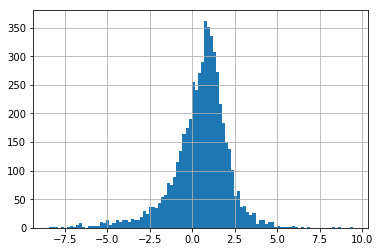

In [1375]:
log10_roi = revenue_divided_by_budget.apply(lambda x: np.log(x))
log10_roi.hist(bins=100);

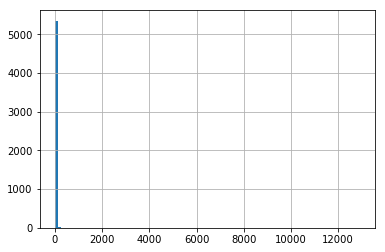

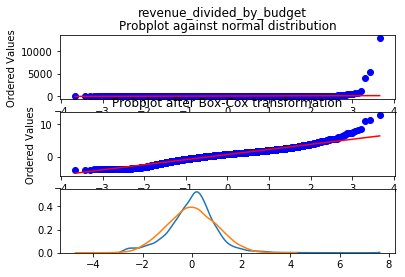

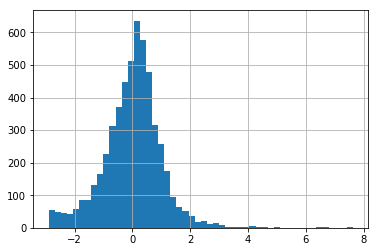

In [1370]:
revenue_divided_by_budget_normalised = revenue_divided_by_budget.copy()
revenue_divided_by_budget_normalised.hist(bins=100);

revenue_divided_by_budget_normalised[revenue_divided_by_budget_normalised.notnull()] = box_cox_normalise( revenue_divided_by_budget_normalised.dropna(),
                   offset=0.01 )
plt.figure();
pd.Series(revenue_divided_by_budget_normalised).hist(bins=50);


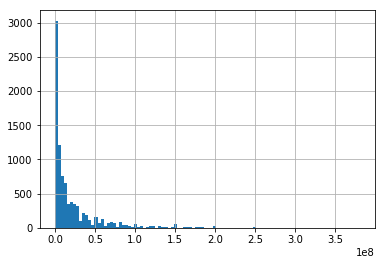

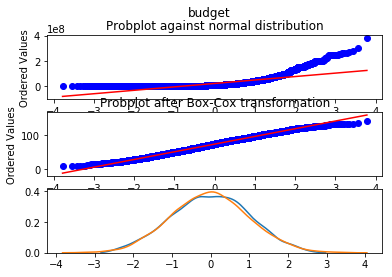

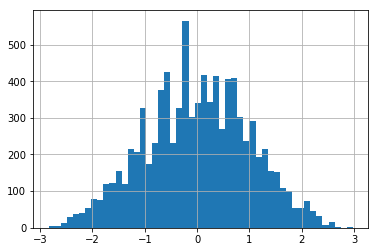

In [1371]:
budget_normalised = budget.copy()
budget_normalised.hist(bins=100);

budget_normalised[budget_normalised.notnull()] = box_cox_normalise( budget_normalised.dropna(),
                   offset=0.01 )
plt.figure();
pd.Series(budget_normalised).hist(bins=50);


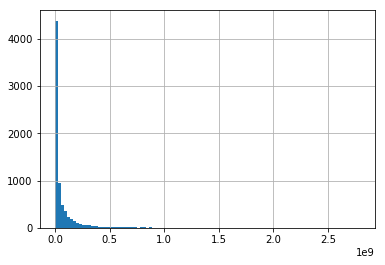

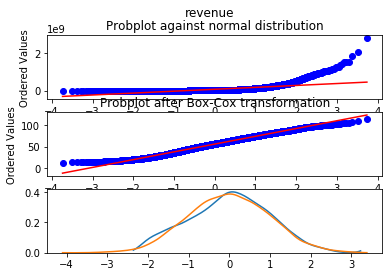

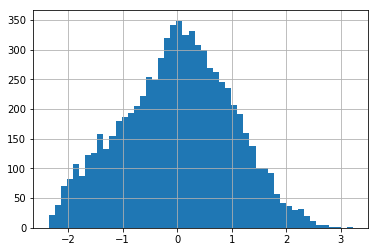

In [1372]:
revenue_normalised = revenue.copy()
revenue_normalised.hist(bins=100);

revenue_normalised[revenue_normalised.notnull()] = box_cox_normalise( revenue_normalised.dropna(),
                   offset=0.01)
plt.figure();
pd.Series(revenue_normalised).hist(bins=50);


In [1376]:
TMB_movies_metadata["budget"]  = budget
TMB_movies_metadata["budget_normalised"]  = budget_normalised
TMB_movies_metadata["revenue"] = revenue
TMB_movies_metadata["revenue_normalised"] = revenue_normalised
TMB_movies_metadata["revenue_divided_by_budget"] = revenue_divided_by_budget
TMB_movies_metadata["revenue_divided_by_budget_normalised"] = revenue_divided_by_budget_normalised

In [1133]:
# runtime 257 nulls, 
# mode = 90 mins mos, 

TMB_movies_metadata[ "runtime" ] = TMB_movies_metadata[ "runtime" ].replace(0,np.nan)
TMB_movies_metadata[ "runtime" ].value_counts().sort_index()

1.0       107
2.0        33
3.0        48
4.0        51
5.0        51
6.0        72
7.0       103
8.0        78
9.0        63
10.0       64
11.0       45
12.0       46
13.0       40
14.0       33
15.0       45
16.0       31
17.0       33
18.0       34
19.0       19
20.0       45
21.0       21
22.0       31
23.0       17
24.0       22
25.0       51
26.0       30
27.0       24
28.0       19
29.0       25
30.0       62
         ... 
476.0       1
480.0       1
485.0       1
500.0       2
501.0       1
523.0       1
540.0       1
543.0       1
550.0       2
551.0       1
552.0       1
561.0       1
566.0       1
583.0       1
585.0       1
600.0       2
644.0       1
669.0       1
680.0       1
705.0       1
720.0       1
780.0       1
840.0       2
874.0       1
877.0       1
900.0       1
925.0       1
931.0       1
1140.0      2
1256.0      1
Name: runtime, Length: 352, dtype: int64

In [1135]:
%%time
import sys

def sizeof_fmt(num, suffix='B'):
    ''' By Fred Cirera, after https://stackoverflow.com/a/1094933/1870254'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f%s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f%s%s" % (num, 'Yi', suffix)

def memory_use(locs = locals().items()):
    gc.collect()
    # locals().items()
    for name, size in sorted(((name, sys.getsizeof(value)) for name,value in locs),
                             key= lambda x: -x[1])[:10]:
        print("{:>30}: {:>8}".format(name,sizeof_fmt(size)))
        
memory_use()

                           _58: 996.6MiB
                SER_tag_genome: 982.8MiB
                    ML_ratings: 847.0MiB
                   TMB_ratings: 794.2MiB
                           _53: 794.2MiB
              ML_genome_scores: 340.2MiB
                  SER_training: 305.1MiB
                           _21: 161.7MiB
                           _39: 161.7MiB
                      TMB_crew: 130.7MiB
Wall time: 56.7 s


In [ ]:
# long but *not* TV series
# 6896	Shoah	1985.0	566.0
# 172591	The Godfather Trilogy: 1972-1990	1992.0	583.0
# 102742	Tie Xi Qu: West of the Tracks	2002.0	551 (weird ref to "in 3 parts")


In [1459]:
TMB_cast[TMB_cast["movieId"]==793]

,cast_id,character,credit_id,id,order,max_order,fractional_order,movieId
12474,2,Antonin Artaud,52fe4aa8c3a368484e16032b,17578,0,0,NaN,793


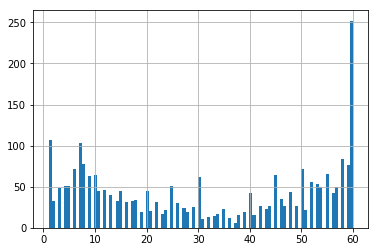

In [1195]:
TMB_movies_metadata[ "runtime" ][TMB_movies_metadata[ "runtime" ]<=60].hist(bins=100)

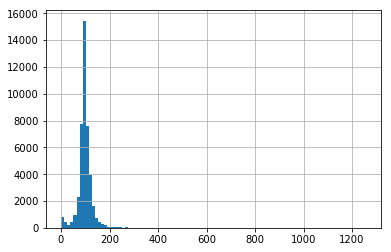

In [1136]:
TMB_movies_metadata[ "runtime" ].hist(bins=100)

In [1202]:
# where do we draw the "the line" between what we assume to be TV and what we assume to be film by length?
# over 300 mins
stupidly_long_films = [167882, 159612, 8660, 26359, 147130, 97648, 158161, 58649, 149346, 90312,
                       74706, 159017, 78723, 108481, 176271, 7767, 69509, 149822, 111377, 86471,
                       26197, 72657, 160289, 139331, 102327, 102742, 6896, 172591 ]
TMB_movies_metadata.loc[158366,"runtime"] = 66 # Owen Hart of Gold (outrageously wrong!)

# 167882	The Miracle Rider	1935.0	306.0 FILM
# 159612	Anders Matthesen: Tal For Dig Selv	2004.0	311.0 FILM?
# 145100	If Tomorrow Comes	1986.0	313.0 TV
# 168644	Great Migrations	2010.0	315.0 TV
# 8660	The Deluge	1974.0	315.0 FILM
# 51559	Eight Deadly Shots	1972.0	316.0 TV
# 26359	1900	1976.0	317.0 FILM
# 161470	The Far Pavilions	1984.0	320.0 TV
# 7762	Tinker Tailor Soldier Spy	1979.0	320.0 TV
# 147130	The French Revolution	1989.0	320.0 ???
# 97648	Gangs of Wasseypur	2012.0	320.0 FILM (2 parts??)
# 158161	Sleep	1963.0	321.0 FILM 
# 169954	Prohibition	2011.0	330.0 TV
# 58649	Napoleon	1927.0	332.0 FILM
# 107410	Guest from the Future	1984.0	334.0 TV
# 149346	Homeland (Iraq Year Zero)	2016.0	334.0 ???
# 86487	Mildred Pierce	2011.0	336.0 TV
# 81817	Carlos	2010.0	338.0 TV
# 90312	Quiet Flows the Don	1957.0	340.0 ???
# 26804	Return to Lonesome Dove	1993.0	340.0 TV
# 74706	La Commune (Paris, 1871)	2001.0	345.0 FILM
# 169782	River	2015.0	349.0 TV
# 159017	Adolf Hitler: The Greatest Story Never Told	2013.0	350.0 FILM
# 38499	Angels in America	2003.0	352.0 TV
# 166175	Tanner '88	1988.0	353.0 TV
# 78723	Little Dorrit	1987.0	357.0 FILM
# 146327	Can't Change the Meeting Place	1979.0	359.0 ???
# 88376	Comanche Moon	2008.0	360.0 TV
# 108481	Forever Hardcore: The Documentary	2005.0	360.0 FILM
# 26453	Smiley's People	1982.0	360.0 TV

# 176271	Century of Birthing	2011.0	360.0 FILM
# 141450	Thief	2006.0	360.0 TV
# 135182	The Men Who Built America	2012.0	360.0 TV
# 162808	Scarlett	1994.0	360.0 TV
# 101850	The Staircase	2004.0	360.0 TV
# 166518	Nature's Great Events	2009.0	360.0 Tv
# 168790	The Body Farm	2011.0	360.0 TV
# 147370	Tut	2015.0	360.0 TV
# 172661	Wolf Hall	2015.0	360.0 TV
# 173591	The Guyver: Bio-Booster Armor	1989.0	360.0 TV
# 172741	Pirates: Blood Brothers	1999.0	360.0 TV

# 147775	Dancing on the Edge	2013.0	363.0 TV
# 26849	The Stand	1994.0	366.0 TV
# 7767	The Best of Youth	2003.0	366.0 FILM
# 95517	The Barchester Chronicles	1982.0	370.0 TV
# 160317	Roots	2016.0	383.0 TV
# 122711	Oliver Twist	1999.0	386.0 TV
# 172739	Игра на выбывание	NaN	386.0 TV
# 158366	Owen Hart of Gold	2015.0	388.0 ??? runtime was wrong
# 151629	World Without End	2012.0	389.0 TV
# 100553	Frozen Planet	2011.0	392.0 TV
# 141739	Days of Hope	1975.0	395.0 TV

# 69509	Les vampires	1915.0	399.0 FILM
# 99532	Les Misérables	2000.0	400.0 TV
# 149822	The Work of Director Spike Jonze	2003.0	400.0 FILM
# 111377	Crystal Lake Memories: The Complete History of...	2013.0	400.0 FILM
# 104072	The Count of Monte Cristo	1998.0	400.0 TV
# 142115	The Blue Planet	2001.0	400.0 TV
# 86471	The Perils of Pauline	1914.0	410.0 FILM
# 27251	The 10th Kingdom	2000.0	417.0 TV
# 26197	War and Peace	1966.0	422.0 FILM (4 parts???)
# 174181	The Keepers	2017.0	432.0 TV
# 157498	11.22.63	2016.0	432.0 TV
# 164260	Horace and Pete	2016.0	436.0 TV
# 151357	The Bible	2013.0	440.0 TV
# 72657	Hitler: A Film from Germany	1977.0	442.0 FILM
# 33264	Satantango	1994.0	450.0 FILM
# 143521	Pennies from Heaven	1978.0	450.0 TV
# 143990	Little Dorrit	2008.0	452.0 TV
# 160289	O.J.: Made in America	2016.0	463.0 ?? (5parts)
# 128320	Monty Python - Almost the Truth (The Lawyer's ...	2009.0	464.0 TV
# 157278	The Sixties	2013.0	468.0 TV
# 108709	Generation Kill	2008.0	470.0 TV
# 139331	Leviathan: The Story of Hellraiser and Hellbou...	2015.0	476.0 FILM (are documentaries a cheat?)
# 159199	War and Peace	2007.0	480.0 TV
# 102327	Empire	1964.0	485.0 FILM
# 146329	The Master and Margarita	2005.0	500.0 TV
# 159819	Life	2009.0	500.0 TV
# 61406	John Adams	2008.0	501.0 TV
# 158184	Shaka Zulu	1986.0	523.0 TV
# 126430	The Pacific	2010.0	540.0 TV
# 155109	Long Way Down	2010.0	543.0 ???
# 159817	Planet Earth	2006.0	550.0 TV
# 172905	The Idiot	2003.0	550.0 TV
# 102742	Tie Xi Qu: West of the Tracks	2002.0	551.0 FILM
# 62972	Into the West	2005.0	552.0 TV
# 121119	North and South, Book I	1985.0	561.0 TV

# 6896	Shoah	1985.0	566.0 FILM
# 172591	The Godfather Trilogy: 1972-1990	1992.0	583.0 FILM
# 147252	The Untold History of the United States	2012.0	585.0 TV
# 102672	New York: A Documentary Film	1999.0	600.0 TV
# 123621	Space	1985.0	600.0 TV
# 151585	Liquidation	2007.0	644.0 TV
# 137904	I, Claudius	1976.0	669.0 TV
# 93040	The Civil War	1990.0	680.0 TV
# 170705	Band of Brothers	2001.0	705.0 TV
# 27002	From the Earth to the Moon	1998.0	720.0 TV
# 174375	Hollywood	1980.0	780.0 TV
# 147124	The Roosevelts: An Intimate History	2014.0	840.0 TV
# 147290	Seventeen Moments in Spring	1973.0	840.0 TV
# 95604	The War	2007.0	874.0 TV
# 123288	Taken	2002.0	877.0 TV
# 127180	The Story of Film: An Odyssey	2011.0	900.0 TV
# 70186	Heimat: A Chronicle of Germany	1984.0	925.0 TV
# 69241	Berlin Alexanderplatz	1980.0	931.0 TV
# 98795	Jazz	2001.0	1140.0 TV
# 165069	Baseball	1994.0	1140.0 TV
# 114382	Centennial	1978.0	1256.0 TV


## too short!
TMB_movies_metadata.loc[144674,"runtime"] = 90 #My Grandpa the Bankrobber	 (outrageously wrong!)


In [1203]:
TMB_movies_metadata["tv_not_film"] = (TMB_movies_metadata["runtime"]>300)
TMB_movies_metadata.loc[stupidly_long_films,"tv_not_film"] = False

In [ ]:
# 


# All TV series except




1    14552
2    14471
3     9578
4     3377
0     2442
5      829
6      157
7       24
8        3
Name: genres, dtype: int64

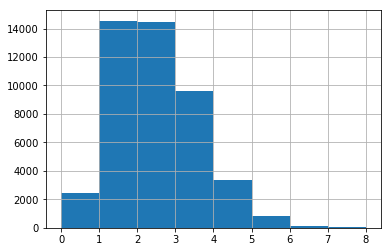

In [1141]:
# genres, no nulls
num_genres_per_movie = TMB_movies_metadata["genres"].apply(lambda x: len(eval(x)))
num_genres_per_movie.hist(bins=num_genres.max());
num_genres_per_movie.value_counts()

In [1142]:
flat_list = [item for sublist in TMB_movies_metadata["genres"].apply(lambda x: eval(x)).values for item in sublist]
genres = pd.DataFrame(flat_list).drop_duplicates().sort_values(by="id")
genre_list = TMB_movies_metadata["genres"].apply(lambda x: eval(x)).apply(lambda x: [y['id'] for y in x])
genres["movieId_list"] = genres.apply(lambda x: genre_list[genre_list.apply(lambda y: x["id"] in y)].index.values ,axis=1)


In [1143]:
for gen_ind in genres.index:
    gen_name = "genres_"+genres.loc[gen_ind,"name"]
    TMB_movies_metadata.loc[genres.loc[gen_ind,"movieId_list"],gen_name] = 1
    TMB_movies_metadata[gen_name] = TMB_movies_metadata[gen_name].replace(np.nan,0).astype('int')
    
TMB_movies_metadata["num_genres_per_movie"]=num_genres_per_movie

In [1269]:
# homepage 37659 nulls, 7774 notnulls
num_movies_per_homepage = TMB_movies_metadata["homepage"].value_counts()

# features -> present/not present?
# number of films point at same website?
TMB_movies_metadata["num_other_movies_with_same_homepage"] = TMB_movies_metadata["homepage"].apply(lambda x: num_movies_per_homepage[x]-1 if pd.notnull(x) else np.nan)

In [1145]:
# id, imdb_id -> drop - we have a separate table just for these!
TMB_movies_metadata.drop(["id","imdb_id"],axis=1,inplace=True)

In [1146]:
# original_language 11 nulls, 45422 notnulls
# 89 different languages
# looks like https://www.sitepoint.com/iso-2-letter-language-codes/
# https://gist.github.com/alexanderjulo/4073388
# https://pypi.org/project/iso-639/ (looks nice, but want to avoid too many modules!)
TMB_movies_metadata["original_language"].value_counts()

en    32251
fr     2436
it     1529
ja     1347
de     1079
es      994
ru      826
hi      508
ko      444
zh      409
sv      383
pt      316
cn      313
fi      295
nl      248
da      224
pl      219
tr      150
cs      130
el      113
no      106
fa      100
hu      100
ta       78
th       75
he       67
sr       63
ro       57
te       45
ar       39
      ...  
eu        3
ky        3
kn        3
kk        3
ps        2
pa        2
am        2
lo        2
ne        2
bo        2
iu        2
mn        2
af        2
lb        1
la        1
gl        1
qu        1
zu        1
hy        1
tg        1
uz        1
cy        1
rw        1
eo        1
sm        1
fy        1
ay        1
mt        1
si        1
jv        1
Name: original_language, Length: 89, dtype: int64

In [1147]:
# spoken_languages 0 nulls

1     33715
2      5368
0      3827
3      1705
4       549
5       178
6        62
7        14
8         6
9         5
19        1
13        1
12        1
10        1
Name: spoken_languages, dtype: int64

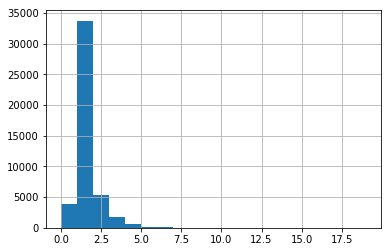

In [1148]:
num_langs_per_movie = TMB_movies_metadata["spoken_languages"].apply(lambda x: len(eval(x)))
num_langs_per_movie.hist(bins=num_langs_per_movie.max());
num_langs_per_movie.value_counts()

In [1149]:
# create set of all languages in the dataset
flat_list = [item for sublist in TMB_movies_metadata["spoken_languages"].apply(lambda x: eval(x)).values for item in sublist]
langs = pd.DataFrame(flat_list).drop_duplicates()

original_language_frequency = langs.set_index('iso_639_1').loc[TMB_movies_metadata["original_language"].dropna()].reset_index()["iso_639_1"].value_counts()

langs = langs.set_index('iso_639_1')
langs.loc[original_language_frequency.index, "original_language_frequency"] = original_language_frequency.values

langs["original_language_frequency"] = langs["original_language_frequency"].replace(np.nan, 0)

langs["original_language_frequency"] = langs["original_language_frequency"].astype('int')
langs = langs.sort_values(by="original_language_frequency", ascending=False)
langs = langs.reset_index()
langs["id"]=langs.index


In [ ]:
# slow - obviously a better way to do this!
TMB_movies_metadata["original_language"] = TMB_movies_metadata_safe["original_language"].apply(lambda x: langs[langs['iso_639_1']==x]["id"].values[0] if pd.notnull(x) else np.nan).values

TMB_movies_metadata["spoken_languages"] = TMB_movies_metadata["spoken_languages"].apply(lambda x: eval(x)).apply(lambda ln_dicts: [ langs[langs["iso_639_1"]==ln['iso_639_1']].index[0] for ln in ln_dicts])
TMB_movies_metadata["num_langs_per_movie"] = num_langs_per_movie

In [1152]:
# original_title : no nulls
# title: no nulls

# how many times has that *original_title* appeared
TMB_movies_metadata["original_title"].value_counts().head(5)

Alice in Wonderland    8
Hamlet                 8
Macbeth                7
Les Misérables         7
Cinderella             7
Name: original_title, dtype: int64

In [1153]:
# title is even more "compressed"
TMB_movies_metadata["title"].value_counts().head(5)

Cinderella              11
Hamlet                   9
Alice in Wonderland      9
Beauty and the Beast     8
Les Misérables           8
Name: title, dtype: int64

In [1154]:
# 11389 differences
original_title_differs_from_title = (TMB_movies_metadata["original_title"] != TMB_movies_metadata["title"])
original_title_differs_from_title.sum()

11389

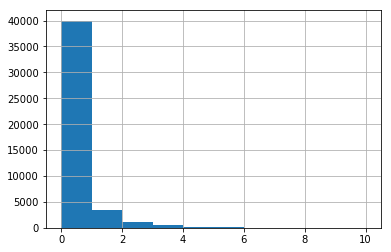

In [1155]:
title_used_by_num_other_movies = TMB_movies_metadata["title"].value_counts().loc[TMB_movies_metadata["title"]]-1
title_used_by_num_other_movies.hist(bins=title_used_by_num_other_movies.max());

In [1156]:
TMB_movies_metadata["original_title_differs_from_title"] = original_title_differs_from_title.values
TMB_movies_metadata["title_used_by_num_other_movies"] = title_used_by_num_other_movies.values

[' ', 'Plot unknown', '...', 'x', 'Not Available', 'Directed by']


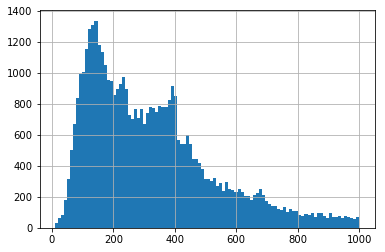

In [1286]:
# overview: text, 954 nulls -> 1109 nulls after cleaning
garbage_overviews = [" ","Plot unknown","...","x","Not Available","Directed by"]
no_overview_placeholders = list(TMB_movies_metadata["overview"].dropna().apply(lambda x: x if re.search("overview",x.lower()) and len(x)<40 else np.nan).dropna().unique())+garbage_overviews
print(no_overview_placeholders)
TMB_movies_metadata["overview"] = TMB_movies_metadata["overview"].apply(lambda x: np.nan if x in no_overview_placeholders else x)

# overview lengths
overview_length = TMB_movies_metadata["overview"].apply(lambda x: len(x) if pd.notnull(x) else np.nan)
overview_length.hist(bins=100);
TMB_movies_metadata["overview_length"] = overview_length

In [759]:
# reset column!
# TMB_movies_metadata.drop("overview", axis=1, inplace=True)
# TMB_movies_metadata["overview"] = TMB_movies_metadata_safe["overview"].values
# TMB_movies_metadata["overview"].isnull().sum()

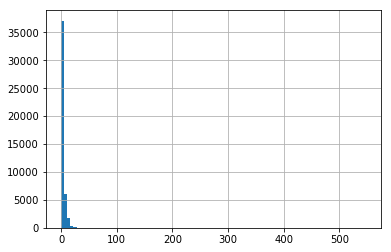

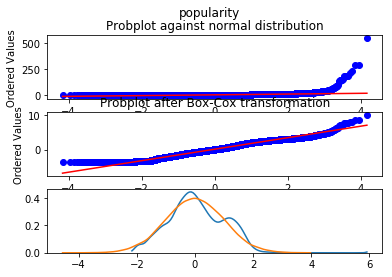

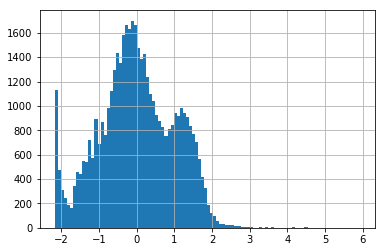

In [1158]:
# popularity: float, no nulls
TMB_movies_metadata["popularity"].hist(bins=100);


popularity_normalised = box_cox_normalise( TMB_movies_metadata["popularity"],
                   offset=0.01)
plt.figure();
pd.Series(popularity_normalised).hist(bins=100);

TMB_movies_metadata["popularity_normalised"] = popularity_normalised
# so some clear lower bound censoring problems
# (levels of unpopularity where it's hard to get people to even log in to say "this is unpopular"?)
# weird bimodality (is the second peak the peak of the "hollywood movies people actually put money into"?)
# And that right hand tail ... (top pop is "Minions")

In [1160]:
# poster_path /<str 25-27 len>.jpg(8 pngs) 383 nulls
# fails_to_match_pattern = TMB_movies_metadata["poster_path"].dropna().apply(lambda x: False if re.match( "/[a-zA-Z0-9]{25,27}\.(jpg|png)", x ) else True)
# TMB_movies_metadata["poster_path"].dropna().apply(lambda x: len(x)).value_counts()

In [1161]:
# production_companies no nulls
evaluated_prod_companies = TMB_movies_metadata['production_companies'].apply(lambda x: eval(x))


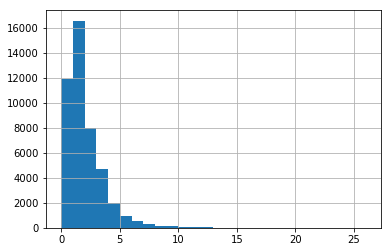

In [1162]:
num_production_companies = evaluated_prod_companies.apply(lambda x: len(x))
num_production_companies.hist(bins=num_production_companies.max());
# large number of prod companies mostly seem to be French films!
# but also big productions like Manderlay
# and anthologies like Voices of Europe (not the anti-immigrant blog!)
# https://www.imdb.com/title/tt0425624/

In [1163]:
prod_company_list = evaluated_prod_companies.apply(lambda ser: [x['id'] for x in ser])
prod_company_list = prod_company_list.reset_index()

flat_list = [item for sublist in evaluated_prod_companies.values for item in sublist]
prod_companies = pd.DataFrame(flat_list).drop_duplicates().sort_values("id")
prod_companies.index = prod_companies["id"]


from  itertools import chain
full_movieId_to_prod_company_df = pd.DataFrame({ "movieId": np.repeat(prod_company_list["movieId"].values,
                                                            prod_company_list["production_companies"].str.len()),
                                                 "production_companies": list(chain.from_iterable(prod_company_list["production_companies"]))})

prod_companies["movieId_list"] = full_movieId_to_prod_company_df.groupby("production_companies").apply(lambda x: x["movieId"].values)
prod_companies["number_of_movies"] = prod_companies["movieId_list"].apply(lambda x: len(x))
prod_companies = prod_companies.sort_values(by  = "number_of_movies", ascending=False)

In [1164]:
TMB_movies_metadata['production_companies'] = prod_company_list.set_index("movieId")["production_companies"]
TMB_movies_metadata['num_production_companies'] = num_production_companies

In [938]:
# matching indices!
# (TMB_movies_metadata.index == prod_company_list.set_index("movieId").index).all()

1     32135
0      6279
2      4872
3      1468
4       460
5       151
6        38
7        12
8         7
9         5
11        2
25        1
15        1
12        1
10        1
Name: production_countries, dtype: int64

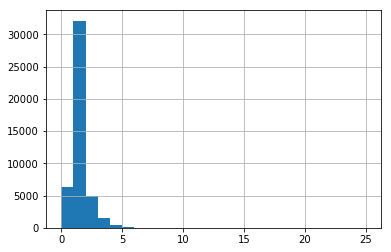

In [1167]:
# production_countries no nulls,, json column

evaluated_prod_countries = TMB_movies_metadata['production_countries'].apply(lambda x: eval(x))

num_production_countries = evaluated_prod_countries.apply(lambda x: len(x))

num_production_countries.hist(bins=num_production_countries.max());
num_production_countries.value_counts()
# Visions of Europe at 25
# Look of Silence - companion to The Act of Killing at 10

In [1168]:
prod_countries_list = evaluated_prod_countries.apply(lambda ser: [x['iso_3166_1'] for x in ser])
prod_countries_list = prod_countries_list.reset_index()

flat_list = [item for sublist in evaluated_prod_countries.values for item in sublist]
prod_countries = pd.DataFrame(flat_list).drop_duplicates().sort_values("iso_3166_1")
prod_countries.index = prod_countries["iso_3166_1"]


from  itertools import chain
full_movieId_to_prod_countries_df = pd.DataFrame({ "movieId": np.repeat(prod_countries_list["movieId"].values,
                                                            prod_countries_list["production_countries"].str.len()),
                                                 "production_countries": list(chain.from_iterable(prod_countries_list["production_countries"]))})

prod_countries["movieId_list"] = full_movieId_to_prod_countries_df.groupby("production_countries").apply(lambda x: x["movieId"].values)
prod_countries["number_of_movies"] = prod_countries["movieId_list"].apply(lambda x: len(x))
prod_countries = prod_countries.sort_values(by  = "number_of_movies", ascending=False)

In [1169]:
TMB_movies_metadata['production_countries'] = prod_countries_list.set_index("movieId")["production_countries"]
TMB_movies_metadata['num_production_countries'] = num_production_countries

In [1009]:
# release_date nulls 84, 1/1/<year> 3142, ~42000 full dates

In [1170]:
release_dates = pd.to_datetime(TMB_movies_metadata['release_date']).apply(lambda x: x.date())

In [1171]:
release_year = release_dates.apply(lambda x: x.year)
release_month = release_dates.apply(lambda x: x.month)
release_day = release_dates.apply(lambda x: x.day)
# making this a string
release_decade = release_year.apply(lambda x: str(int(10*np.floor(x/10))) if pd.notnull(x) else np.nan)
years_since_first_movie = (release_year-release_year.min())

In [1172]:
fake_dates = (release_month==1) & (release_day==1)
release_month[fake_dates] = np.nan
release_day[fake_dates] = np.nan

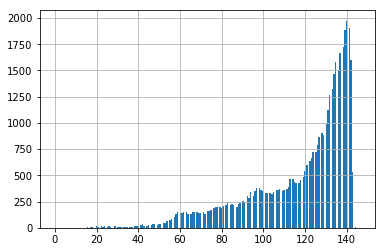

In [1173]:
(release_year-release_year.min()).hist(bins=200);

In [1174]:
TMB_movies_metadata['release_date'] = release_dates
TMB_movies_metadata['release_year'] = release_year
TMB_movies_metadata['release_month'] = release_month
TMB_movies_metadata['release_day'] = release_day
TMB_movies_metadata['release_decade'] = release_decade
TMB_movies_metadata['years_since_first_movie'] = years_since_first_movie

In [1209]:
# status 81 nulls, 6 different states
# easily dummiable, but probably better as a filter
TMB_movies_metadata["status"].value_counts()
# canceled = "Independence Day 3", "Paanch"

Released           44988
Rumored              229
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [1302]:
# TMB_movies_metadata["status_released"]
TMB_movies_metadata["status_released"] = (TMB_movies_metadata["status"]=="Released")

Based on a true story.           7
Be careful what you wish for.    4
Trust no one.                    4
Who is John Galt?                3
Know Your Enemy                  3
Name: tagline, dtype: int64

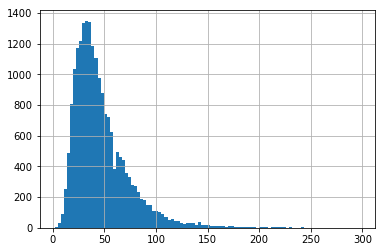

In [1307]:
#tagline 25031 nulls
# "-", '   '
# Most common "Based on a true story.", "Trust no one."
TMB_movies_metadata["tagline"] = TMB_movies_metadata["tagline"].replace("-",np.nan).replace("   ",np.nan)
tagline_length = TMB_movies_metadata["tagline"].apply(lambda x: len(x) if pd.notnull(x) else np.nan)
TMB_movies_metadata["tagline_length"] = tagline_length
tagline_length.hist(bins=100);

num_movies_per_tagline = TMB_movies_metadata["tagline"].value_counts()
TMB_movies_metadata["num_other_movies_with_same_tagline"] = TMB_movies_metadata["tagline"].apply(lambda x: num_movies_per_tagline[x]-1 if pd.notnull(x) else np.nan)
num_movies_per_tagline.head()

In [1229]:
# video no nulls
TMB_movies_metadata['video'].value_counts()
# not really clear what this is -imdb ref "straigh to video"/ never appeared in cinemas?

False    45340
True        93
Name: video, dtype: int64

In [1255]:
TMB_movies_metadata["vote_average"].isnull().sum()

2896

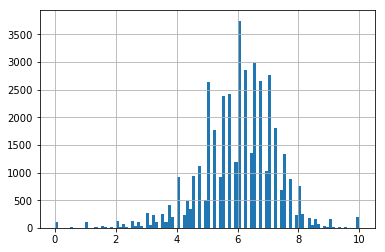

In [1256]:
# vote_average no nulls -> 2896 nulls
# 0.0-10.0 increments of .1

TMB_movies_metadata.loc[TMB_movies_metadata['vote_count']==0,'vote_average'] = np.nan
TMB_movies_metadata['vote_average'].hist(bins=100);

In [1314]:
TMB_movies_metadata['vote_count'] = TMB_movies_metadata_safe['vote_count']

In [1315]:
# vote_counts no nulls min=0, max=14075
# TMB_movies_metadata['vote_count'].min(),TMB_movies_metadata['vote_count'].max()

TMB_movies_metadata['vote_count'].value_counts().head(10)

1    3263
2    3132
0    2896
3    2782
4    2479
5    2096
6    1747
7    1568
8    1359
9    1194
Name: vote_count, dtype: int64

In [1258]:
TMB_movies_metadata_safe.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'movieId'],
      dtype='object')

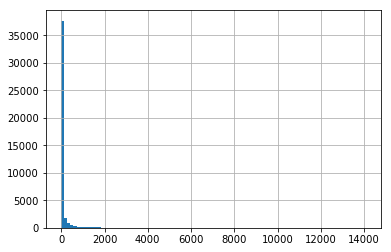

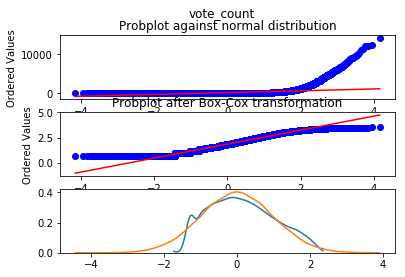

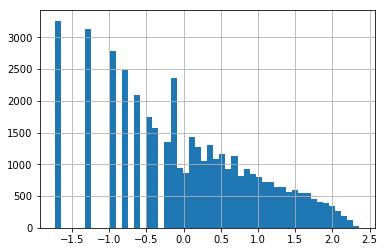

In [1316]:
# complete failure to normalise!
vote_count   = TMB_movies_metadata["vote_count"].copy()

vote_count[vote_count==0] = np.nan

vote_count.hist(bins=100);

vote_count[vote_count.notnull()] = box_cox_normalise( vote_count.dropna(),
                   offset=0.01)
plt.figure();
pd.Series(vote_count).hist(bins=50);

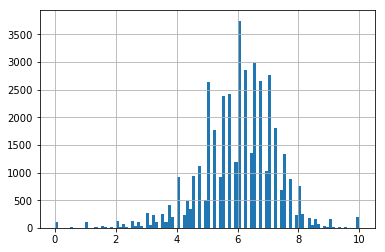

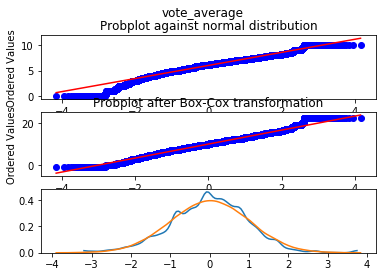

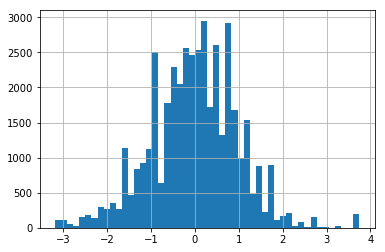

In [1317]:
vote_average = TMB_movies_metadata["vote_average"].copy()

vote_average.hist(bins=100);

vote_average[vote_average.notnull()] = box_cox_normalise( vote_average.dropna(),
                   offset=0.01)
plt.figure();
pd.Series(vote_average).hist(bins=50);


In [1318]:
TMB_movies_metadata["vote_average_normalised"] = vote_average
TMB_movies_metadata.drop("genres",axis=1, inplace=True)

In [1319]:
# adult : bool -> int
# belongs_to_collection : int id -> collection df
    # collection
# budget, revenue: float (lot of fixes), budget, budget_normalised, revenue, revenue_normalised, revenue_divided_by_budget, revenue_divided_by_budget_normalised
# genres : dummied into bool genres_<Genres>, int num_genres_per_movie**
# homepage : left as string, int num_other_movies_with_same_homepage*
# id, imdb_id : dropped as already covered in TMB_links_amalgamated
# original_language : int points at lang df ids, num_langs_per_movie**
# spoken_languages: list of ints pointing at lang df ids
    # langs
# original_title, title: left as strings, bool original_title_differs_from_title, int title_used_by_num_other_movies**
# overview: left as string (some cleaning), int overview_length**
# popularity: float (0-550+), float popularity_normalised
# poster_path: string - jpgs, few pngs mostly consistent format left as is
# production_companies: strings -> converted to list int ids pointing at prod_companies df, int num_production_companies**
    # prod_companies
# production_countries : strings -> converted to list int id pointing at production_countries df, int num_production_countries**
    # prod_countries
# release_date : converted to datetime object, int release_year, int release_month, int release_day, str release_decade, int years_since_first_movie
#    (release_decade should be dummied)
# runtime : float, some "films" (>300mins) actually clearly tv so created tv_not_film (with exceptions for actually v long films)
# status: str categories (just 6), could dummy but almost all is in 'released', so just make dummy bool status_released
# tagline: str bit of cleaning otherwise left as is, int tagline_length, int num_other_movies_with_same_tagline
# video: bool, mostly false - not 100% clear what this is (no cinema release?)
# vote_count, vote_average: int/float, some cleaning (0 votes -> vote_average=0 -> np.nan), vote_average_normalised
#    (tried to normalise vote_count - complete failure!)

# movieId: int - one unique id I want for the dataset/to link to other datasets (also set as index, just conv to have as columns)


# ** (maybe don't normalised unless important?)    


In [1383]:
# TMB_movies_metadata.to_csv(Dataset_directory+"Processed"+os.sep+"TMB_movies_metadata.csv")

collections.to_csv(Dataset_directory+"Processed"+os.sep+"TMB_collections.csv")
langs.to_csv(Dataset_directory+"Processed"+os.sep+"TMB_langs.csv")
prod_companies.to_csv(Dataset_directory+"Processed"+os.sep+"TMB_prod_companies.csv")
prod_countries.to_csv(Dataset_directory+"Processed"+os.sep+"TMB_prod_countries.csv")



In [155]:
## (3) The Movie Lens latest 58k movies

dataset = "Movie_Lens_Latest"
# informative README.txt!

# tagId,tag (1128,  2)
ML_genome_tags = pd.read_csv(Dataset_directory+ dataset +os.sep+"genome-tags.csv")

# movieId,imdbId,tmdbId (58,098,  3)
ML_links = pd.read_csv(Dataset_directory+ dataset +os.sep+"links.csv")

# movieId,title,genres (58,098,  3)
# genres -> | separated list
#    Romance,Fantasy,IMAX,Action,Sci-Fi,Western,Drama,Horror,Mystery,Adventure,War,Comedy,Musical,Documentary,Thriller,
#    Film-Noir,(no genres listed),Crime,Animation,Children'
ML_movies = pd.read_csv(Dataset_directory+ dataset +os.sep+"movies.csv")

# userId,movieId,tag,timestamp (1,108,997,  4)
# tags look user submitted - 74714 different tags - not consistent with genome_tags length/tagId range
ML_tags = pd.read_csv(Dataset_directory+ dataset +os.sep+"tags.csv")

# movieId,tagId,relevance (14,862,528,  3)
# each of 1128 tagIds x 13176 movieIds (dense matrix)
# relevance is machine learning output (inverse distribution)
ML_genome_scores = pd.read_csv(Dataset_directory+ dataset +os.sep+"genome-scores.csv")

# userId,movieId,rating,timestamp (27,753,444,  4)
ML_ratings = pd.read_csv(Dataset_directory+ dataset +os.sep+"ratings.csv")


In [ ]:
ML_movie_ratings = ML_ratings[["movieId","rating"]].groupby("movieId").apply(lambda x: [x["rating"].count(), x["rating"].mean(), x["rating"].std()])
ML_movie_ratings = ML_movie_ratings.apply(pd.Series)
ML_movie_ratings.columns = ["n","ratings_mean","ratings_std"]
ML_movie_ratings['n'] = ML_movie_ratings['n'].astype('int')

In [160]:
# deal with tags/relevance scores later

ML_movie_ratings.to_csv(Dataset_directory+"Processed"+os.sep+"ML_movie_ratings.csv") 
ML_links.to_csv(Dataset_directory+"Processed"+os.sep+"ML_links.csv")
# could split up genres
ML_movies.to_csv(Dataset_directory+"Processed"+os.sep+"ML_movies.csv")

In [20]:
## (1) PERSONALITY DATASET

personality_dataset = "personality-isf2018"

# userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,
# assigned condition,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,
# predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,
# predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,
# movie_12,predicted_rating_12,is_personalized,enjoy_watching (1834, 34)
PERS_personality_data = pd.read_csv(Dataset_directory+ personality_dataset +os.sep+"personality-data.csv")

# userid,movieId,rating,tstamp (1028751, 4)
PERS_ratings = pd.read_csv(Dataset_directory+ personality_dataset +os.sep+"ratings.csv")

# remove random spaces in column names!
PERS_personality_data.columns = [x.strip() for x in PERS_personality_data.columns]

# remove random spaces and deal with typo in userid
PERS_ratings.columns = ['userid', 'movieId', 'rating', 'tstamp']


# big-5 correlation with specific movie ratings


# PERS_ratings_and_big5["movieId"].value_counts()

# some movies get ~1500 ratings, mean is 30, many get only 1, trim out the 1s and mean jumps to ~60

In [28]:
%%time
PERS_movie_ratings = PERS_ratings[["movieId","rating"]].groupby("movieId").apply(lambda x: [x["rating"].count(), x["rating"].mean(), x["rating"].std()])
PERS_movie_ratings = PERS_movie_ratings.apply(pd.Series)
PERS_movie_ratings.columns = ["n","ratings_mean","ratings_std"]
PERS_movie_ratings

Wall time: 52.2 s


In [32]:
gc.collect()

168

In [29]:
corr_simple_pearsonr

<function utility.corr_simple_pearsonr>

In [33]:
big5 = ['openness', 'agreeableness', 'emotional_stability',
       'conscientiousness', 'extraversion']

In [ ]:
# 35196 movieIds
# 11092 movies with only 1 rating
# 20311 movies with only <5 ratings

In [67]:
def get_big5_corr_test(df):
    corr_fn = corr_simple_pearsonr
    list_of_outputs = {}
    if df.shape[0]>1:
        for pers in big5:
            (list_of_outputs[pers+"_r"], list_of_outputs[pers+"_p"], list_of_outputs[pers+"_n"]) = corr_fn( df["rating"] , df[pers] )
            list_of_outputs[pers+"_mean"]  = df[pers].mean()
            list_of_outputs[pers+"_std"]  = df[pers].std()
    else:
        for pers in big5:
            list_of_outputs[pers+"_r"] = np.nan
            list_of_outputs[pers+"_p"] = np.nan
            list_of_outputs[pers+"_n"] = 1
            (list_of_outputs[pers+"_r"], list_of_outputs[pers+"_p"], list_of_outputs[pers+"_n"]) = corr_fn( df["rating"] , df[pers] )
            list_of_outputs[pers+"_mean"]  = df[pers].mean()
            list_of_outputs[pers+"_std"]  = df[pers].std()        

    return list_of_outputs

In [22]:
def get_big5_corr(df):
    (openness_corr, p, n) = corr_simple_pearsonr( df["rating"],df["openness"] )
    if p>.05: openness_corr = np.nan
        
    openness_mean = df["openness"].mean()
    openness_std = df["openness"].std()

    (agreeableness_corr, p, n) = corr_simple_pearsonr( df["rating"],df["agreeableness"] )
    if p>.05: agreeableness_corr = np.nan
        
    agreeableness_mean = df["agreeableness"].mean()
    agreeableness_std = df["agreeableness"].std()
    
    (emotional_stability_corr, p, n) = corr_simple_pearsonr( df["rating"],df["emotional_stability"] )
    if p>.05: emotional_stability_corr = np.nan
        
    emotional_stability_mean = df["emotional_stability"].mean()
    emotional_stability_std = df["emotional_stability"].std()
    
    (conscientiousness_corr, p, n) = corr_simple_pearsonr( df["rating"],df["conscientiousness"] )
    if p>.05: conscientiousness_corr = np.nan
        
    conscientiousness_mean = df["conscientiousness"].mean()
    conscientiousness_std = df["conscientiousness"].std()
    
    (extraversion_corr, p, n) = corr_simple_pearsonr( df["rating"],df["extraversion"] )
    if p>.05: extraversion_corr = np.nan
        
    extraversion_mean = df["extraversion"].mean()
    extraversion_std = df["extraversion"].std()
    
    rating_mean = df["rating"].mean()
    rating_std = df["rating"].std()
        
    

    return [n, openness_corr, agreeableness_corr, emotional_stability_corr, conscientiousness_corr, extraversion_corr,
           openness_mean, openness_std, agreeableness_mean, agreeableness_std, emotional_stability_mean, emotional_stability_std,
           conscientiousness_mean, conscientiousness_std, extraversion_mean, extraversion_std, rating_mean, rating_std]       

In [23]:
# %debug

In [24]:
# per movie (where num ratings >=2)
    # rating mean, rating sd, corr with big 5(p<0.05)
# can compare to big5xrating correlation cross all movies

In [35]:
PERS_userid_by_big5 = PERS_personality_data[['userid']+big5].groupby('userid').mean()

In [36]:
PERS_ratings_and_big5 = PERS_ratings[["movieId","rating"]].copy()
PERS_ratings_and_big5[big5] = PERS_userid_by_big5.loc[ PERS_ratings["userid"] ].reset_index()[big5]
# movies_rated_2_or_more_times = PERS_ratings_and_big5["movieId"].value_counts()[PERS_ratings_and_big5["movieId"].value_counts()>=2].index

In [72]:
%%time
# 1000-> 25s
# 10000 -> 180s
# 20000 -> 300s
df = PERS_ratings_and_big5.groupby('movieId').apply(lambda x: get_big5_corr_test(x) )

C:\Users\Marios\Anaconda3\envs\BES_analysis\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Marios\Anaconda3\envs\BES_analysis\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


Wall time: 13min 40s


In [76]:
df2 = df.apply(pd.Series)

In [93]:
n_variables = [x for x in df2.columns if "_n" in x]
df2["N"] = df2[n_variables[0]]
df2.drop(n_variables, axis=1, inplace=True)

In [97]:
df2["N"] = df2["N"].astype('int')

In [212]:
Dataset_directory = ".."+os.sep+"Datasets"+os.sep

# TMB_movies_metadata = pd.read_csv(Dataset_directory+"Processed"+os.sep+

# df2.to_csv(Dataset_directory+"Processed"+os.sep+"big5_corr.csv")
# PERS_big5_corr = df2
PERS_big5_corr.to_csv(Dataset_directory+"Processed"+os.sep+"PERS_big5_corr.csv")

In [55]:
# # mask_2_or_more_ratings.sum(), PERS_ratings_and_big5.shape
# PERS_ratings_and_big5["mask_2_or_more_ratings"] = mask_2_or_more_ratings

In [52]:
# mask_2_or_more_ratings = PERS_ratings_and_big5["movieId"].apply(lambda x: x in movies_rated_2_or_more_times)

In [27]:
# %%time
# # guess ~7 mins
# # .loc[movies_rated_2_or_more_times]
# big5_corr = PERS_ratings_and_big5.set_index('movieId').reset_index().groupby('movieId').apply(lambda x: get_big5_corr(x))

C:\Users\Marios\Anaconda3\envs\BES_analysis\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Marios\Anaconda3\envs\BES_analysis\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


Wall time: 14min 52s


In [ ]:
big5_corr_df = big5_corr.apply(pd.Series)
big5_corr_df.columns = ['n']+big5+["openness_mean", "openness_std", "agreeableness_mean", "agreeableness_std", "emotional_stability_mean", "emotional_stability_std",
           "conscientiousness_mean", "conscientiousness_std", "extraversion_mean", "extraversion_std", "rating_mean", "rating_std"]
big5_corr_df.to_csv(Dataset_directory+"big5_corr.csv")
big5_corr_df.isnull().sum()

In [342]:
big5_corr_df["n"] = big5_corr_df["n"].astype('int')
PERS_big5_corr_df = big5_corr_df.copy()

In [327]:
intersection( big5_corr_df[big5_corr_df["openness_mean"]==big5_corr_df["openness_mean"].max()].index,
              ML_movies["movieId"] )

600

In [334]:
## save it


In [336]:
var1 = "conscientiousness_mean"

ML_movies.set_index('movieId').loc[ intersection( big5_corr_df[big5_corr_df[var1]==big5_corr_df[var1].min()].index,
              ML_movies["movieId"] ) ].head(10)

,title,genres
movieId,,
76776,Pigsty (Porcile) (1969),Drama|Mystery
154792,I Embrace You With 1000 Arms (2006),Drama
169260,Germany: A Summer's Fairytale (2006),Documentary
92751,Kokowääh (2011),Comedy
119184,Bad Karma (1991),Horror
192851,Love Is All (2007),Comedy|Romance
162836,The Greggs (2014),(no genres listed)
70488,Wings of Hope (Julianes Sturz in den Dschungel...,Adventure|Documentary
118458,H6: Diario de un asesino (2005),Horror|Thriller


In [332]:
var1 = "openness_mean"

ML_movies.set_index('movieId').loc[ intersection( big5_corr_df[big5_corr_df[var1]==big5_corr_df[var1].min()].index,
              ML_movies["movieId"] ) ].head(10)

,title,genres
movieId,,
41402,Lorna (1964),Drama
177531,Fast Company (1979),Drama
164135,Bangkok Traffic Love Story (2009),Comedy|Romance
83583,Distance (2001),Drama


Int64Index([  1528,   2603,   3651,   4455,   4456,   4460,   4906,   5286,
              5616,   5922,
            ...
            196727, 197033, 197043, 197495, 197689, 197713, 197901, 197903,
            197955, 198091],
           dtype='int64', name='movieId', length=649)

In [333]:
big5_corr_df.columns

Index(['n', 'openness', 'agreeableness', 'emotional_stability',
       'conscientiousness', 'extraversion', 'openness_mean', 'openness_std',
       'agreeableness_mean', 'agreeableness_std', 'emotional_stability_mean',
       'emotional_stability_std', 'conscientiousness_mean',
       'conscientiousness_std', 'extraversion_mean', 'extraversion_std',
       'rating_mean', 'rating_std'],
      dtype='object')

In [53]:
big5_corr_df = big5_corr.apply(pd.Series)
big5_corr_df.columns = ['n']+big5+["openness_mean", "openness_std", "agreeableness_mean", "agreeableness_std", "emotional_stability_mean", "emotional_stability_std",
           "conscientiousness_mean", "conscientiousness_std", "extraversion_mean", "extraversion_std", "rating_mean", "rating_std"]
big5_corr_df.to_csv(Dataset_directory+"big5_corr.csv")
big5_corr_df.isnull().sum()

n                               0
openness                    30394
agreeableness               30146
emotional_stability         30466
conscientiousness           30488
extraversion                30570
openness_mean                   0
openness_std                11092
agreeableness_mean              0
agreeableness_std           11092
emotional_stability_mean        0
emotional_stability_std     11092
conscientiousness_mean          0
conscientiousness_std       11092
extraversion_mean               0
extraversion_std            11092
rating_mean                     0
rating_std                  11092
dtype: int64

In [61]:
big5_corr_df[big5+["n"]]

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,n
movieId,,,,,,
1,NaN,0.11,NaN,NaN,NaN,1191.0
2,NaN,0.10,NaN,NaN,NaN,585.0
3,NaN,NaN,NaN,NaN,NaN,118.0
4,NaN,NaN,NaN,NaN,NaN,32.0
5,NaN,NaN,NaN,NaN,NaN,147.0
6,NaN,NaN,NaN,NaN,NaN,478.0
7,NaN,NaN,NaN,NaN,NaN,132.0
8,NaN,NaN,0.43,0.43,NaN,21.0
9,NaN,0.41,NaN,NaN,-0.40,44.0


1.0          NaN
2.0     0.811975
3.0     0.290323
4.0     0.235003
5.0     0.215015
6.0     0.241643
7.0     0.245283
8.0     0.235890
9.0     0.243612
10.0    0.242616
Name: n, dtype: float64

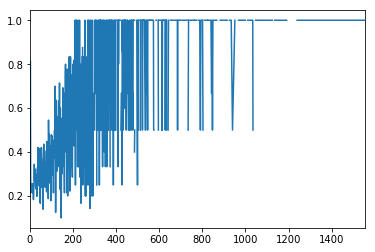

In [69]:
fraction_with_non_nans = (big5_corr_df["n"][ big5_corr_df[big5].notnull().any(axis=1) ].value_counts()/big5_corr_df["n"].value_counts())
display(fraction_with_non_nans.head(10))
fraction_with_non_nans.plot()

In [54]:
big5_corr_df["n"][ big5_corr_df[big5].applymap(lambda x:x in [-1,1]).any(axis=1) ].value_counts()

2.0    3770
3.0     801
4.0      53
5.0       4
Name: n, dtype: int64

In [ ]:
# We can decide how to filter by n later

In [23]:
# big5_corr_df["n"].value_counts()

In [55]:
big5_corr_df.mean()

n                           29.229202
openness                    -0.048690
agreeableness                0.096032
emotional_stability          0.078393
conscientiousness           -0.024879
extraversion                 0.104176
openness_mean                5.295015
openness_std                 0.964743
agreeableness_mean           4.246878
agreeableness_std            1.188624
emotional_stability_mean     4.438112
emotional_stability_std      1.259993
conscientiousness_mean       4.720282
conscientiousness_std        1.194048
extraversion_mean            3.279245
extraversion_std             1.364410
rating_mean                  3.049702
rating_std                   0.815893
dtype: float64

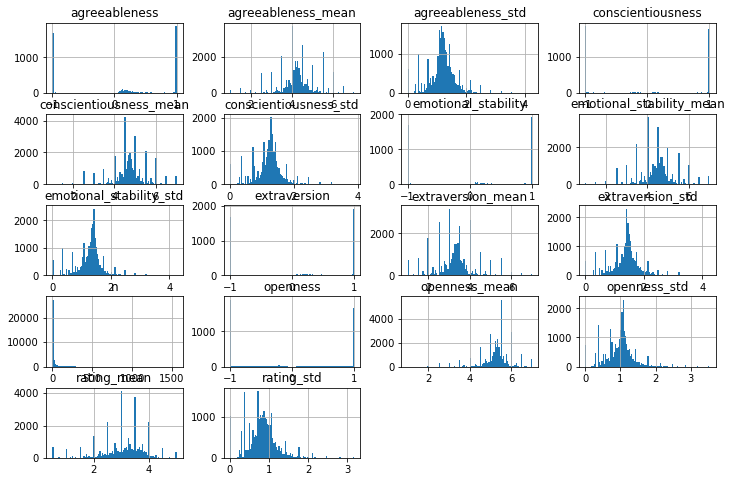

In [56]:
big5_corr_df.hist(bins=100, figsize = (12,8));

In [26]:
big5_corr_df[big5].corr()
# feels like two clusters

# openness-extraversion
# agreeableness-conscientiousness-emotional_stability

,openness,agreeableness,emotional_stability,conscientiousness,extraversion
openness,1.000000,0.124747,0.017298,0.027710,0.300420
agreeableness,0.124747,1.000000,0.187456,0.146202,0.127230
emotional_stability,0.017298,0.187456,1.000000,0.316140,0.056152
conscientiousness,0.027710,0.146202,0.316140,1.000000,0.058479
extraversion,0.300420,0.127230,0.056152,0.058479,1.000000


In [76]:
@interact
def show_articles_more_than(column=big5, x=(-1,1,.1), n=10, lt=True, return_top=20):
    if lt:
        indices = big5_corr_df[ (big5_corr_df[column]<=-x) & (big5_corr_df["n"]>=n) ].index
        return ML_movies.set_index('movieId').loc[intersection(indices,np.unique(ML_movies["movieId"]))].head(return_top)
    else:
        indices = big5_corr_df[ (big5_corr_df[column]>=x) & (big5_corr_df["n"]>=n) ].index
        return ML_movies.set_index('movieId').loc[intersection(indices,np.unique(ML_movies["movieId"]))].head(return_top)

interactive(children=(Dropdown(description='column', options=('openness', 'agreeableness', 'emotional_stabilit…

In [35]:
# conscientioussness neg corr with high rating for ...
    # It's a Very Merry Muppet Christmas Movie (2002)
    # Itty Bitty Titty Committee (2007)

In [36]:
# ML_movies.set_index('movieId').loc[big5_corr_df[ (big5_corr_df["conscientiousness"]>=.75) & (big5_corr_df["n"]>=10) ].index]
# high conscientiousness => high rating Jerry Springer: Ringmaster (1998)?

In [37]:
# ML_movies.set_index('movieId').loc[big5_corr_df[ (big5_corr_df["emotional_stability"]>=.75) & (big5_corr_df["n"]>=10) ].index]
# don't recognise any, but do note that they are nearly all drama!

In [38]:
# movies whose rating is v negatively corr with extraversion
# ML_movies.set_index('movieId').loc[big5_corr_df[ (big5_corr_df["emotional_stability"]<=-.75) & (big5_corr_df["n"]>=10) ].index]

# low emotional stability => high rating for Anna Karenina (and vice versa)

In [39]:
# movies whose rating is v pos corr with extraversion
# ML_movies.set_index('movieId').loc[big5_corr_df[ (big5_corr_df["extraversion"]>=.75) & (big5_corr_df["n"]>=10) ].index]

In [ ]:
# Trailer Park boys seems to correlate neg with openness ... and pos with extraversion???

In [40]:
# movies whose rating is v neg corr with openness
# ML_movies.set_index('movieId').loc[big5_corr_df[ (big5_corr_df["openness"]<-.75) & (big5_corr_df["n"]>=10) ].index]
# Elvira, Mistress of the Dark (1988)	huh?

In [41]:
# movies whose rating is v pos corr with openness
# ML_movies.set_index('movieId').loc[big5_corr_df[ (big5_corr_df["openness"]>=.75) & (big5_corr_df["n"]>=10) ].index]
# Ilsa, She Wolf of the SS (1974) -> Nazi sexpolioitation" ... I guess that's what I expected?
# Lone Wolf and Cub: Sword of Vengeance -> not actually made up for Bob's Burgers!
# Hannah Arendt (2012)	 again seems right PERS_ratingsfor high "openness"

In [711]:
PERS_personality_data['userid'].value_counts().head(7)

4638502dc978788ec9d44e64e43a6757    9
c56613815b9f708eb9df7eb6afd42a49    2
75a54727bffcbbb561da9d3eb604f28e    2
9ba0ccf0a69ae15c85d1b289baa4d494    2
5e82ce34f999ec0dbd2859b8b04dfcbf    2
3e0c0afd46ee7366f328ddf1dae83479    2
01e4e18e2e21b84ee1c5813fd5d3797f    2
Name: userid, dtype: int64

In [45]:
display( PERS_ratings["userid"].value_counts().head(10) )
display( PERS_ratings["userid"].value_counts().tail(10) ) 

1a4926479ca0b4c42df6cefb89aa59d9    9286
030001ac2145a938b07e686a35a2d638    8663
5251c36a5e4898da28a44a17b065a6b6    7940
b54372490fb6e3ccace51c0e3541db08    6743
8e7cebf9a234c064b75016249f2ac65e    6419
8a90d8a5aa3eb0be3da2c9b9cdae731c    5271
51486a050b36f396d461df563f9a8772    4610
041878034fe703d8f461afd053425b6b    4515
b9bfbe1d5cdb0990a6ab685ff5ecb6b7    4506
bbabaddade82aade657681b63523f969    4345
Name: userid, dtype: int64

9600462a6d913c56cb1b32a40a4bdbe3    16
96010e899a726c946163f2aa0cc4f0e4    16
b907feed50762a0a68d150a4a5a876fb    15
6dca8d2b55c96bb04fcbe16f259fffde    15
c8e7cc901691e1af1acca7bd18008748    15
26a31aa56d3ea83b8afb08dfec49b0b3    15
1a281dc93cf31e7df7c675af254d3a33    15
1526f4a779cc3723c955cddc3a353187    15
da7eec66296808c99884f1ea71b74d13    15
93877243a753b9448d522d016dac6a00     2
Name: userid, dtype: int64

In [105]:

PERS_movie_ratings["n"] = PERS_movie_ratings["n"].astype('int')
PERS_movie_ratings.to_csv(Dataset_directory+"Processed"+os.sep+"PERS_movie_ratings"+".csv")

In [ ]:
## PROBLEM (? TMDB data on budget is *really poor*)
# would really love to augment with some budget/revenue data

## Very intersting!
# https://www.kaggle.com/stephanerappeneau/350-000-movies-from-themoviedborg/downloads/350-000-movies-from-themoviedborg.zip/8
# https://github.com/stephanerappeneau/scienceofmovies

## Fill some gaps with this tmdb scrape
# https://www.kaggle.com/tmdb/tmdb-movie-metadata

## These people hit same problem with different dataset
# discussion: https://www.kaggle.com/c/tmdb-box-office-prediction/discussion/80431#latest-533211
# live kaggle (finishes 10 days!)
# https://www.kaggle.com/c/tmdb-box-office-prediction

## Another TMDB dataset
# https://www.kaggle.com/juzershakir/tmdb-movies-dataset


In [ ]:
## INITIAL ATTEMPTS TO NORMALISE IMDB_DATA

In [48]:
movie_metadata.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

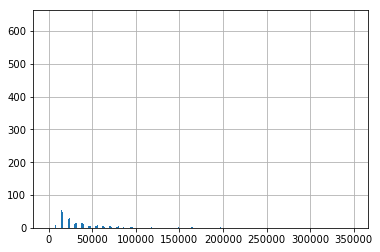

In [176]:
movie_metadata["movie_facebook_likes"].replace(0.0,np.nan).hist(bins=1000);

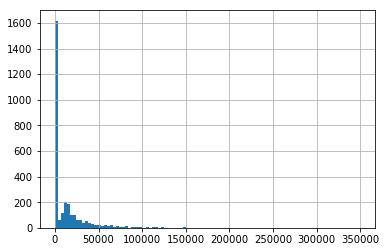

In [173]:
movie_metadata["movie_facebook_likes"].replace(0.0,np.nan).hist(bins=100);

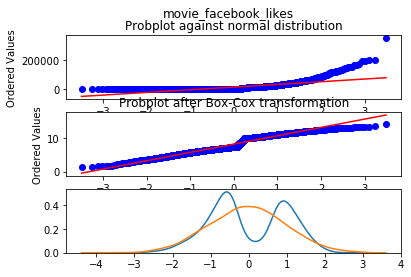

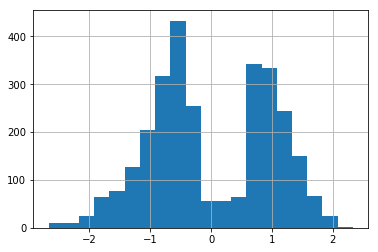

In [172]:
movie_metadata["movie_facebook_likes"].value_counts()

movie_facebook_likes = movie_metadata["movie_facebook_likes"].copy()

# lower bound (0.0) frequency too high to be part of a reasonable distribution
# maybe a sign of a screw up (e.g. scraping wrong name)
movie_facebook_likes = movie_facebook_likes.replace(0.0,np.nan)
movie_zerofblikes_or_unknown = movie_facebook_likes.isnull().astype('float')

# upper end of the distribution suspect (big pile of completely round numbers all off on their own)
movie_veryhigh_suspiciously_roundno_fblikes = (movie_facebook_likes>=1000).astype('float')
# record a 1k likes and higher club
movie_thousands_of_fblikes = movie_facebook_likes.copy()
movie_thousands_of_fblikes[movie_facebook_likes.isnull()] = 0
movie_thousands_of_fblikes[movie_facebook_likes<1000] = 0
movie_thousands_of_fblikes = movie_thousands_of_fblikes/1000
# arguments for/against setting 0 to np.nan

# remove these values from  director_facebook_likes
# movie_facebook_likes[movie_facebook_likes>=1000] = np.nan

# coerce main dataset to be roughly gaussian
movie_facebook_likes[movie_facebook_likes.notnull()] = box_cox_normalise( movie_facebook_likes.dropna(),
                   offset=0)
plt.figure()
movie_facebook_likes.hist(bins=20);
# eh ... good enough!


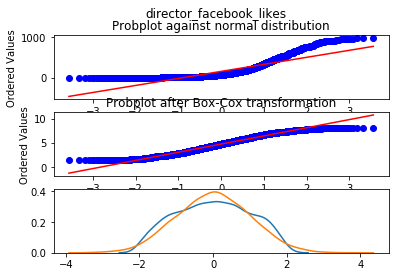

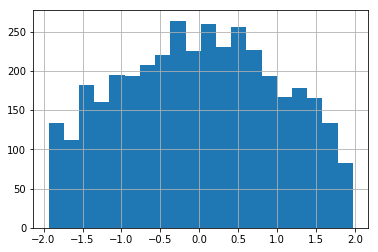

In [178]:
director_facebook_likes = movie_metadata["director_facebook_likes"].copy()

# lower bound (0.0) frequency too high to be part of a reasonable distribution
# maybe a sign of a screw up (e.g. scraping wrong name)
director_facebook_likes = director_facebook_likes.replace(0.0,np.nan)
director_zerofblikes_or_unknown = director_facebook_likes.isnull().astype('float')

# upper end of the distribution suspect (big pile of completely round numbers all off on their own)
director_veryhigh_suspiciously_roundno_fblikes = (director_facebook_likes>=1000).astype('float')
# record a 1k likes and higher club
director_thousands_of_fblikes = director_facebook_likes.copy()
director_thousands_of_fblikes[director_facebook_likes.isnull()] = 0
director_thousands_of_fblikes[director_facebook_likes<1000] = 0
director_thousands_of_fblikes = director_thousands_of_fblikes/1000
# arguments for/against setting 0 to np.nan

# remove these values from  director_facebook_likes
director_facebook_likes[director_facebook_likes>=1000] = np.nan

# coerce main dataset to be roughly gaussian
director_facebook_likes[director_facebook_likes.notnull()] = box_cox_normalise( director_facebook_likes.dropna(),
                   offset=0)
plt.figure()
director_facebook_likes.hist(bins=20);
# eh ... good enough!


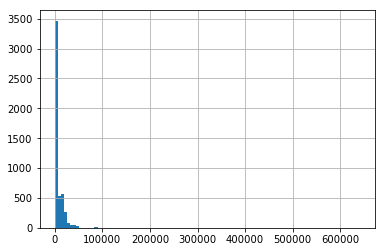

In [180]:
movie_metadata["actor_1_facebook_likes"].hist(bins=100)

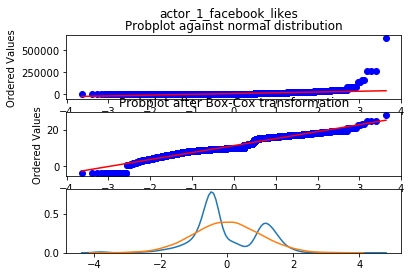

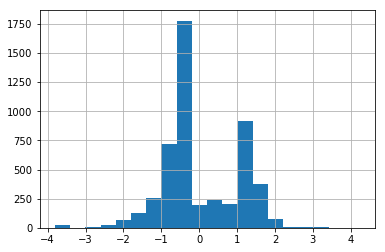

In [179]:
actor_1_facebook_likes = movie_metadata["actor_1_facebook_likes"].copy()

# upper end of the distribution suspect (big pile of completely round numbers all off on their own)
actor_1_veryhigh_suspiciously_roundno_fblikes = (actor_1_facebook_likes>=1000).astype('float')
# record a 1k likes and higher club
actor_1_thousands_of_fblikes = actor_1_facebook_likes.copy()
actor_1_thousands_of_fblikes[actor_1_facebook_likes.isnull()] = 0
actor_1_thousands_of_fblikes[actor_1_facebook_likes<1000] = 0
actor_1_thousands_of_fblikes = actor_1_thousands_of_fblikes/1000
# arguments for/against setting 0 to np.nan

# remove these values from  director_facebook_likes
# actor_1_facebook_likes[actor_1_facebook_likes>=1000] = np.nan

# coerce main dataset to be roughly gaussian
actor_1_facebook_likes[actor_1_facebook_likes.notnull()] = box_cox_normalise( actor_1_facebook_likes.dropna(),
                   offset=0.01)
plt.figure()
actor_1_facebook_likes.hist(bins=20);

# no amount of squinting makes this gaussian

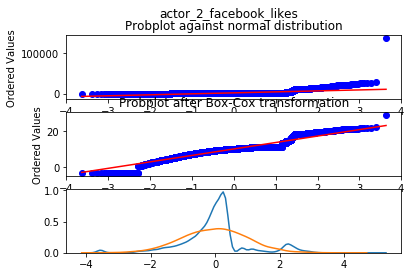

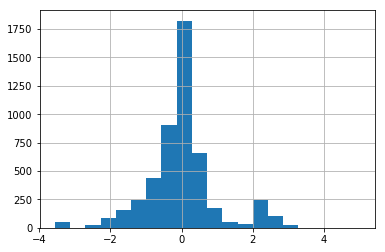

In [181]:
actor_2_facebook_likes = movie_metadata["actor_2_facebook_likes"].copy()

# upper end of the distribution suspect (big pile of completely round numbers all off on their own)
actor_2_veryhigh_suspiciously_roundno_fblikes = (actor_2_facebook_likes>=1000).astype('float')
# record a 1k likes and higher club
actor_2_thousands_of_fblikes = actor_2_facebook_likes.copy()
actor_2_thousands_of_fblikes[actor_2_facebook_likes.isnull()] = 0
actor_2_thousands_of_fblikes[actor_2_facebook_likes<1000] = 0
actor_2_thousands_of_fblikes = actor_2_thousands_of_fblikes/1000
# arguments for/against setting 0 to np.nan

# remove these values from  director_facebook_likes
# actor_2_facebook_likes[actor_2_facebook_likes>=1000] = np.nan

# coerce main dataset to be roughly gaussian
actor_2_facebook_likes[actor_2_facebook_likes.notnull()] = box_cox_normalise( actor_2_facebook_likes.dropna(),
                   offset=0.01)
plt.figure()
actor_2_facebook_likes.hist(bins=20);

# no amount of squinting makes this gaussian

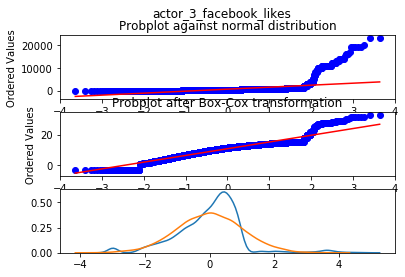

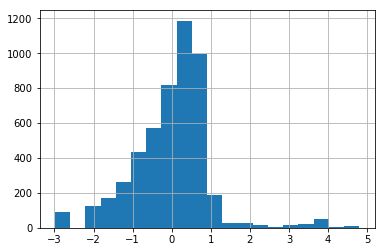

In [182]:
actor_3_facebook_likes = movie_metadata["actor_3_facebook_likes"].copy()

# upper end of the distribution suspect (big pile of completely round numbers all off on their own)
actor_3_veryhigh_suspiciously_roundno_fblikes = (actor_3_facebook_likes>=1000).astype('float')
# record a 1k likes and higher club
actor_3_thousands_of_fblikes = actor_3_facebook_likes.copy()
actor_3_thousands_of_fblikes[actor_3_facebook_likes.isnull()] = 0
actor_3_thousands_of_fblikes[actor_3_facebook_likes<1000] = 0
actor_3_thousands_of_fblikes = actor_3_thousands_of_fblikes/1000
# arguments for/against setting 0 to np.nan

# remove these values from  director_facebook_likes
# actor_3_facebook_likes[actor_3_facebook_likes>=1000] = np.nan

# coerce main dataset to be roughly gaussian
actor_3_facebook_likes[actor_3_facebook_likes.notnull()] = box_cox_normalise( actor_3_facebook_likes.dropna(),
                   offset=0.01)
plt.figure()
actor_3_facebook_likes.hist(bins=20);

# no amount of squinting makes this gaussian

In [ ]:
# I'm not sure how much this is a reflection of generative processses
# weird granularity with suddenly not counting anything other than thousands?



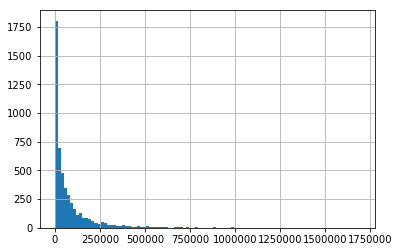

In [184]:
movie_metadata["num_voted_users"].hist(bins=100);

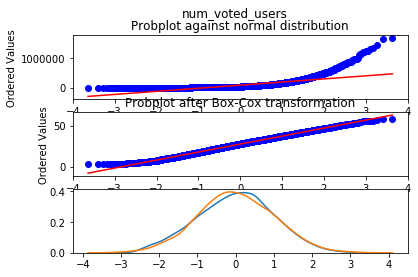

In [189]:
num_voted_users = movie_metadata["num_voted_users"].copy()
num_voted_users[num_voted_users.notnull()] = box_cox_normalise( movie_metadata["num_voted_users"].dropna(),
                   offset=0.01)

# perfect??

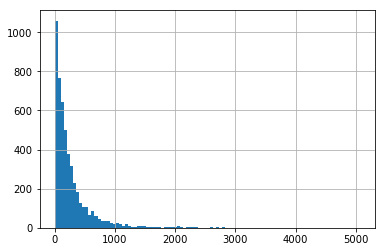

In [187]:
movie_metadata["num_user_for_reviews"].hist(bins=100);
# num_user_for_reviews

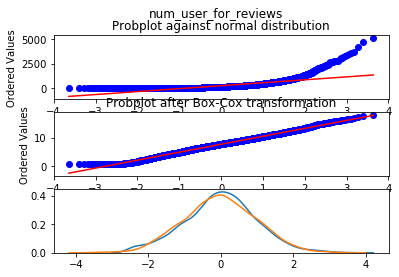

In [191]:
num_user_for_reviews = movie_metadata["num_user_for_reviews"].copy()
num_user_for_reviews[num_user_for_reviews.notnull()] = box_cox_normalise( num_user_for_reviews.dropna(),
                   offset=0.01)

# perfect??

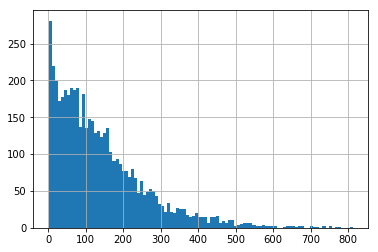

In [192]:
# num_critic_for_reviews
movie_metadata["num_critic_for_reviews"].hist(bins=100);
# num_user_for_reviews


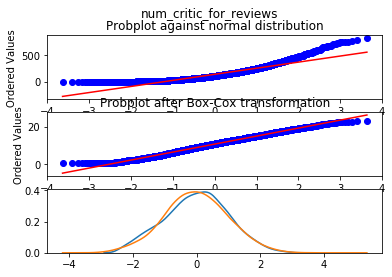

In [193]:
num_critic_for_reviews = movie_metadata["num_critic_for_reviews"].copy()
num_critic_for_reviews[num_critic_for_reviews.notnull()] = box_cox_normalise( num_critic_for_reviews.dropna(),
                   offset=0.01)

# perfect??

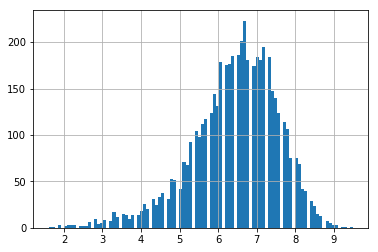

In [194]:
movie_metadata["imdb_score"].hist(bins=100);
# imdb_score

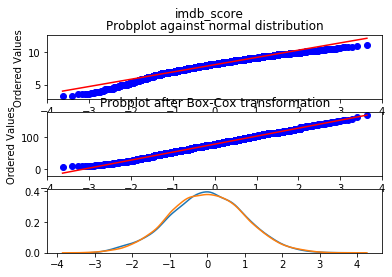

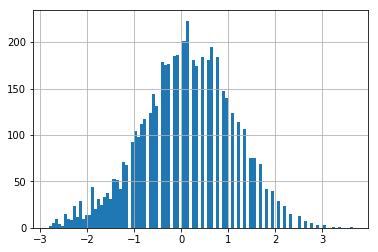

In [197]:
imdb_score = movie_metadata["imdb_score"].copy()
imdb_score[imdb_score.notnull()] = box_cox_normalise( imdb_score.dropna(),
                   offset=0.01)

plt.figure()
imdb_score.hist(bins=100);
# perfect??

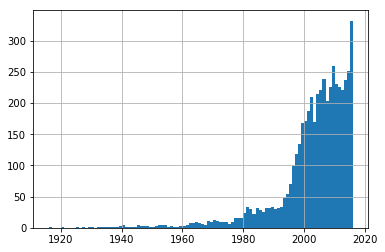

In [199]:
movie_metadata["title_year"].hist(bins=100);
# imdb_score
# title_year

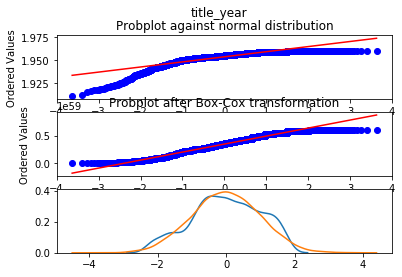

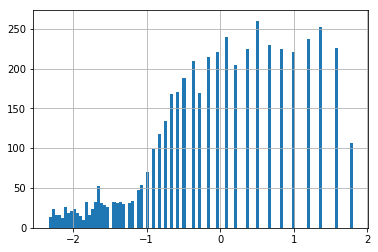

In [206]:
# title_year = box_cox_normalise( movie_metadata["title_year"].dropna()/movie_metadata["title_year"].max(),
#                    offset=0.0001)
# title_year.hist(bins=100)


title_year = movie_metadata["title_year"].copy()
title_year[title_year.notnull()] = box_cox_normalise( title_year.dropna()/title_year.max(),
                   offset=0.01)

plt.figure()
title_year.hist(bins=100);

# Nope
# linear years from first
# decade_dummies

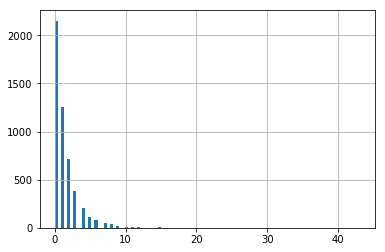

In [208]:
movie_metadata["facenumber_in_poster"].hist(bins=100);

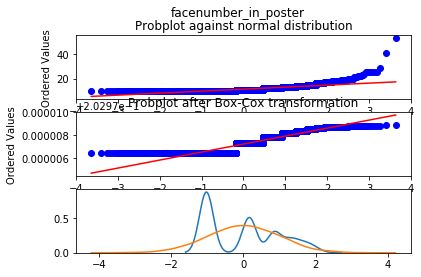

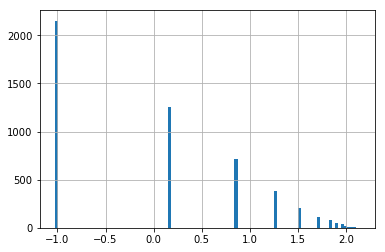

In [211]:
facenumber_in_poster = movie_metadata["facenumber_in_poster"].copy()
facenumber_in_poster[facenumber_in_poster.notnull()] = box_cox_normalise( facenumber_in_poster.dropna(),
                   offset=0.01)

plt.figure()
facenumber_in_poster.hist(bins=100);
# looks very power-law-y

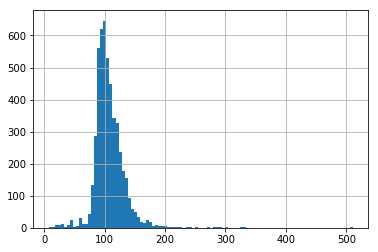

In [212]:
movie_metadata["duration"].hist(bins=100);

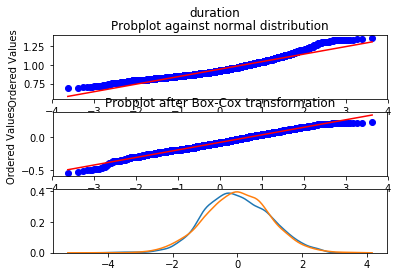

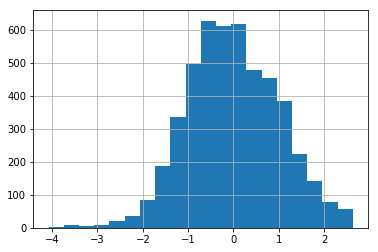

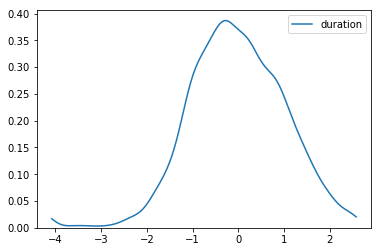

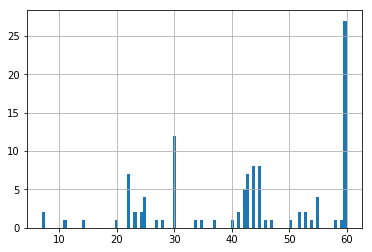

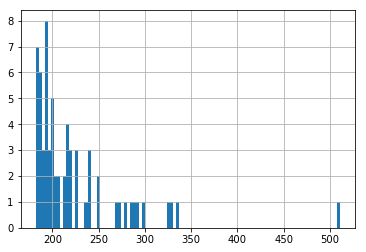

In [308]:
duration = movie_metadata["duration"].copy()

short_movie_less_than = 61
long_movie_greater_than = 181

unusually_short_movie = (duration<short_movie_less_than).astype('float')
unusually_short_movie_duration = duration[duration<short_movie_less_than]

unusually_long_movie = (duration>long_movie_greater_than).astype('float')
unusually_long_movie_duration = duration[duration>long_movie_greater_than]

duration[(duration>long_movie_greater_than) | (duration<short_movie_less_than)] = np.nan
duration[duration.notnull()] = box_cox_normalise( duration.dropna()/duration.dropna().max(),
                   offset=0.01)
plt.figure()
duration.hist(bins=20);
plt.figure()
sns.kdeplot(duration[mask].dropna(), cut=0);

plt.figure();
unusually_short_movie_duration.hist(bins=100);
plt.figure();
unusually_long_movie_duration.hist(bins=100);

In [313]:
movie_metadata["aspect_ratio"].value_counts().sort_index()

1.18        1
1.20        1
1.33       68
1.37      100
1.44        1
1.50        2
1.66       64
1.75        3
1.77        1
1.78      110
1.85     1906
1.89        1
2.00        5
2.20       15
2.24        1
2.35     2360
2.39       15
2.40        3
2.55        2
2.76        3
4.00        7
16.00      45
Name: aspect_ratio, dtype: int64

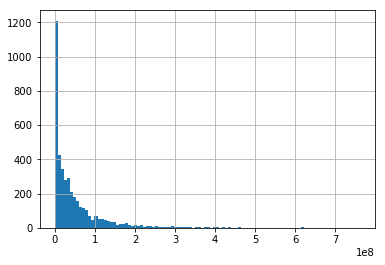

In [315]:
movie_metadata["gross"].hist(bins=100);

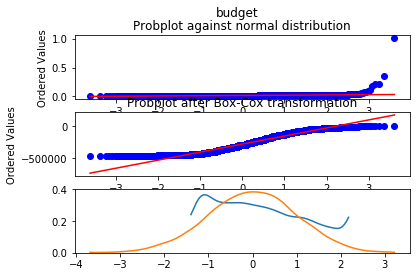

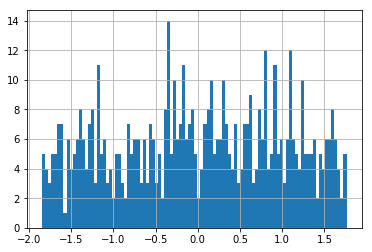

In [383]:
budget = movie_metadata["budget"].copy()

# mask = (movie_metadata["budget"]>10000.0)&(movie_metadata["budget"]<1.000000e+08)

# budget = budget[mask]

budget = box_cox_normalise( budget.dropna()/budget.max(),
                   offset=0.01)

plt.figure();
pd.Series(gross).hist(bins=100);

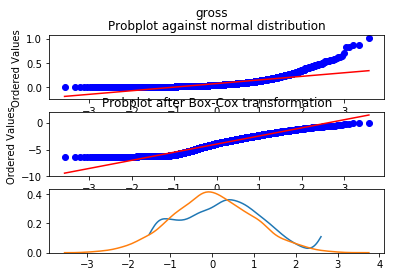

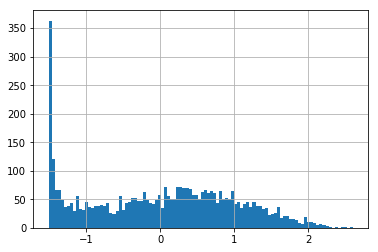

In [384]:
gross = movie_metadata["gross"].copy()

# gross = gross[gross<1000000]

gross = box_cox_normalise( gross.dropna()/gross.max(),
                   offset=0.01)

plt.figure();
pd.Series(gross).hist(bins=100);

In [371]:
profit = (movie_metadata["gross"]-movie_metadata["budget"]).copy()
profit.min()/profit.max()

-23.32982269059547

In [388]:
frac_profit = ((movie_metadata["gross"]-movie_metadata["budget"])/movie_metadata["budget"]).copy()

# gross = gross[gross<1000000]

# frac_profit = box_cox_normalise( frac_profit.dropna()/frac_profit.max(),
#                    offset=.01)

# plt.figure();
# pd.Series(frac_profit).hist(bins=100);

In [411]:
# frac_profit.value_counts().sort_index()

In [398]:
roi = movie_metadata["gross"]/movie_metadata["budget"]
roi[roi>7000]

4793    7194.485533
dtype: float64

In [399]:
movie_metadata.loc[4793]

color                                                                    Color
director_name                                                        Oren Peli
num_critic_for_reviews                                                     409
duration                                                                    84
director_facebook_likes                                                    110
actor_3_facebook_likes                                                      21
actor_2_name                                                     Ashley Palmer
actor_1_facebook_likes                                                     189
gross                                                              1.07917e+08
genres                                                                  Horror
actor_1_name                                                       Micah Sloat
movie_title                                               Paranormal Activity 
num_voted_users                                     

In [405]:
movie_metadata.loc[movie_metadata["budget"][(movie_metadata["gross"]/movie_metadata["budget"])>1000].index][["budget","gross","title_year","movie_title"]]

,budget,gross,title_year,movie_title
4707,60000.0,140530114.0,1999.0,The Blair Witch Project
4793,15000.0,107917283.0,2007.0,Paranormal Activity
4799,218.0,592014.0,2003.0,Tarnation


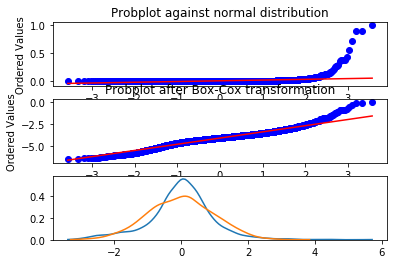

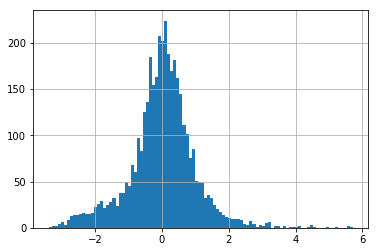

In [382]:
roi = (movie_metadata["gross"]/movie_metadata["budget"]).copy()

# gross = gross[gross<1000000]
roi = roi[roi<1000]

roi = box_cox_normalise( roi.dropna()/roi.max(),
                   offset=0)

plt.figure();
pd.Series(roi).hist(bins=100);

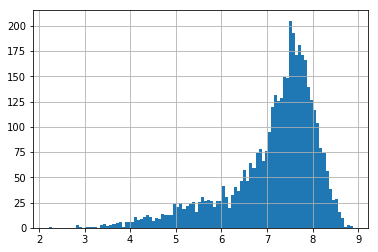

In [319]:
movie_metadata["gross"].apply(lambda x: np.log10(x)).hist(bins=100);

In [322]:
movie_metadata["gross"].dropna().sort_values()

3330          162.0
4607          703.0
4606          721.0
3840          728.0
3552          828.0
4915         1111.0
4758         1332.0
4465         1521.0
4843         1711.0
4720         2245.0
4333         2436.0
4845         2468.0
4399         2580.0
4316         2843.0
3321         2874.0
2589         2964.0
4241         3330.0
4434         3478.0
3242         3607.0
4505         3830.0
3959         4063.0
1527         4091.0
4334         4556.0
5037         4584.0
2061         4756.0
4938         4914.0
4318         4958.0
4130         5005.0
4840         5199.0
4604         5494.0
           ...     
1805    362645141.0
79      362645141.0
812     363024263.0
521     368049635.0
31      373377893.0
339     377019252.0
236     380262555.0
338     380838870.0
125     400736600.0
36      402076689.0
161     403706375.0
27      407197282.0
439     407999255.0
32      408992272.0
43      414984497.0
509     422783777.0
13      423032628.0
186     424645577.0
3080    434949459.0


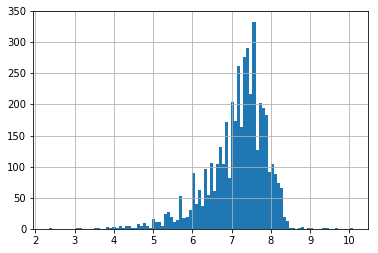

In [335]:
movie_metadata["budget"].apply(lambda x: np.log10(x)).hist(bins=100);

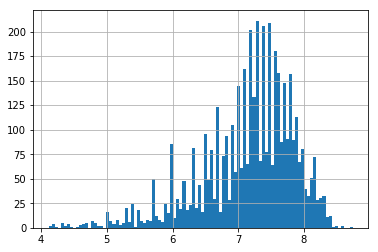

In [350]:
movie_metadata["budget"][mask].apply(lambda x: np.log10(x)).hist(bins=100);

In [342]:
movie_metadata["budget"].dropna().sort_values().tail(10)

3273    6.000000e+08
3851    7.000000e+08
3075    7.000000e+08
4542    1.000000e+09
3423    1.100000e+09
2334    2.127520e+09
2323    2.400000e+09
3005    2.500000e+09
3859    4.200000e+09
2988    1.221550e+10
Name: budget, dtype: float64

In [348]:
mask = (movie_metadata["budget"]>10000.0)&(movie_metadata["budget"]<6.000000e+08)

In [343]:
movie_metadata["budget"].dropna().sort_values().head(10)

4799      218.0
5042     1100.0
5040     1400.0
5036     3250.0
5026     4500.0
5035     7000.0
5034     7000.0
5033     7000.0
5037     9000.0
5028    10000.0
Name: budget, dtype: float64